<table class="table table-bordered">
    <tr>
        <th style="width:50%"><img src='https://www.np.edu.sg/images/default-source/default-album/img-logo.png?sfvrsn=764583a6_0' style="width:2000px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Machine Learning</h1><h2>Assignment 2 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

In [1]:
# import the required packages
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import random
import statsmodels.api as sm

from sklearn.model_selection import train_test_split 
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn. ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm
from xgboost import XGBClassifier, XGBRegressor

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

%matplotlib inline

## 1. HR Analytics

### 1.1 Load and Sample the data

In [2]:
# Load dataset into a DataFrame
df_hr = pd.read_csv('hr_data_new.csv')

# Create a copy of the DataFrame
hr_new = df_hr.copy()

# Show overview of the dataset
hr_new.head(10)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0.035807,0.216832,3,0,0,1,1.036373,5.0,5,0,0,50,0
1,0.278500,0.099617,3,0,0,1,1.030006,4.0,4,1,0,50,1
2,0.278500,0.099617,1,1,1,2,1.024420,4.0,5,1,0,53,1
3,0.216067,0.027850,1,1,0,1,1.021664,3.0,4,0,0,61,0
4,0.278500,0.099617,1,1,0,1,1.023087,4.0,7,0,0,51,0
5,0.278500,0.003826,1,1,1,1,1.021664,1.0,5,0,0,48,0
6,0.278500,0.050803,1,1,0,1,1.021664,3.0,2,0,0,54,0
7,0.216067,0.028309,3,0,0,1,1.027963,3.0,3,1,0,59,1
8,0.278500,0.099617,3,1,0,1,1.036373,5.0,14,1,0,47,0
9,0.142005,0.028309,3,0,0,1,1.025672,5.0,4,1,0,70,0


In [3]:
# Looking at the the concise summary of the dataframe
hr_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9336 entries, 0 to 9335
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            9336 non-null   float64
 1   region                9336 non-null   float64
 2   education             9336 non-null   int64  
 3   gender                9336 non-null   int64  
 4   recruitment_channel   9336 non-null   int64  
 5   no_of_trainings       9336 non-null   int64  
 6   age                   9336 non-null   float64
 7   previous_year_rating  9336 non-null   float64
 8   length_of_service     9336 non-null   int64  
 9   KPIs_met >80%         9336 non-null   int64  
 10  awards_won?           9336 non-null   int64  
 11  avg_training_score    9336 non-null   int64  
 12  is_promoted           9336 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 948.3 KB


In [4]:
# describing the data with techiniques such as Count, Mean and standard deviation 
hr_new.describe()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000
mean,0.180271,0.089866,1.560411,0.695587,0.473329,1.228685,1.027149,3.354220,5.554627,0.508569,0.066945,67.104863,0.500000
std,0.080240,0.077855,0.951414,0.460183,0.547611,0.567723,0.006821,1.507474,3.509634,0.499953,0.249940,14.569584,0.500027
min,0.014384,0.000306,0.000000,0.000000,0.000000,1.000000,1.014878,0.000000,1.000000,0.000000,0.000000,41.000000,0.000000
25%,0.142005,0.023259,1.000000,0.000000,0.000000,1.000000,1.021664,3.000000,3.000000,0.000000,0.000000,54.000000,0.000000
50%,0.145065,0.050038,1.000000,1.000000,0.000000,1.000000,1.026851,3.000000,5.000000,1.000000,0.000000,65.000000,0.500000
75%,0.278500,0.134660,3.000000,1.000000,1.000000,1.000000,1.031841,5.000000,7.000000,1.000000,0.000000,81.000000,1.000000
max,0.278500,0.216832,3.000000,1.000000,2.000000,7.000000,1.039847,5.000000,14.000000,1.000000,1.000000,99.000000,1.000000


## Model 1: Logistic Regression Model

#### Simple Train-Test Split 

In [5]:
# Separating into training and testing sets
lg_x = hr_new.drop('is_promoted', axis=1)
lg_y = hr_new['is_promoted']
lg_x_train, lg_x_test, lg_y_train, lg_y_test = train_test_split(lg_x, lg_y, test_size=0.3, random_state = 0)

lg_x_train.shape, lg_x_test.shape

((6535, 12), (2801, 12))

In [6]:
# looking at the lg_x_train dataset 

In [7]:
# ensuring that all columns but the target column is present 
lg_x_train

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
6811,0.145065,0.034889,1,1,1,1,1.031841,4.0,7,1,0,79
3359,0.105126,0.041163,1,1,0,1,1.020144,3.0,5,0,0,87
1431,0.216067,0.021117,1,0,1,1,1.023087,5.0,2,1,0,92
4992,0.278500,0.025555,1,1,0,1,1.014878,1.0,3,0,0,53
6740,0.145065,0.021117,1,0,1,1,1.030948,4.0,9,0,0,77
...,...,...,...,...,...,...,...,...,...,...,...,...
7891,0.045295,0.216832,1,0,1,1,1.018514,4.0,2,1,1,68
9225,0.145065,0.050803,1,1,0,1,1.037014,3.0,14,0,0,80
4859,0.278500,0.216832,1,0,1,1,1.036373,3.0,14,1,0,48
3264,0.145065,0.216832,3,1,0,1,1.035703,3.0,12,0,0,80


In [8]:
# ensuring that only the target column is present 
lg_y_train 

6811    1
3359    0
1431    1
4992    0
6740    0
       ..
7891    1
9225    0
4859    0
3264    1
2732    1
Name: is_promoted, Length: 6535, dtype: int64

In [9]:
# using this for k-folds later on 
lg_x

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,0.035807,0.216832,3,0,0,1,1.036373,5.0,5,0,0,50
1,0.278500,0.099617,3,0,0,1,1.030006,4.0,4,1,0,50
2,0.278500,0.099617,1,1,1,2,1.024420,4.0,5,1,0,53
3,0.216067,0.027850,1,1,0,1,1.021664,3.0,4,0,0,61
4,0.278500,0.099617,1,1,0,1,1.023087,4.0,7,0,0,51
...,...,...,...,...,...,...,...,...,...,...,...,...
9331,0.278500,0.025555,1,1,1,1,1.039847,3.0,14,0,0,53
9332,0.278500,0.216832,1,0,0,1,1.034268,4.0,6,0,0,45
9333,0.216067,0.216832,1,1,1,1,1.038217,1.0,14,0,0,59
9334,0.278500,0.216832,0,1,0,1,1.029013,4.0,4,1,1,50


In [10]:
# using this for k-folds later on 
lg_y

0       0
1       1
2       1
3       0
4       0
       ..
9331    0
9332    0
9333    0
9334    1
9335    0
Name: is_promoted, Length: 9336, dtype: int64

### 1.2 Build the Model(s)

In [11]:
# train the model using training set
# Create the model "lg"
lg = LogisticRegression(solver='lbfgs', # optimization solver
                        max_iter=10000) # maximum iterations: set a big number to make sure the optimization solver will
# run enough iterations to let the model converge

# Fit the model to the training set
lg.fit(lg_x_train, lg_y_train)

LogisticRegression(max_iter=10000)

In [12]:
# print out the model coefficients and intercept
print(lg.coef_)
print(lg.intercept_)

[[ 5.52379409  1.03872799  0.04972757 -0.0634405   0.01942509 -0.1931865
  -3.09141737  0.22444609 -0.01310836  1.71109519  1.93762208  0.06105343]]
[-3.44779586]


In [13]:
# calculated the training accuracy
print(lg.score(lg_x_train, lg_y_train), '(Train Accuracy)')

0.7312930374904361 (Train Accuracy)


In [14]:
# Calculated the fitted values for training set
y_fitted = lg.predict(lg_x_train) # returns 0 or 1
y_fitted_prob = lg.predict_proba(lg_x_train)[:,0] # returns probabilities

In [15]:
print(y_fitted) # target 'is_promoted' state (0 or 1)
print(y_fitted_prob) # possibility of getting y_fitted

[1 0 1 ... 1 0 1]
[0.20541791 0.56598492 0.05191416 ... 0.47018571 0.58180271 0.37335335]


In [16]:
# evaluate model with test set 

In [17]:
# calculated the testing accuracy
print(lg.score(lg_x_test, lg_y_test), '(Test Accuracy)')

0.7422349161013924 (Test Accuracy)


### Conclusion from initial testing: 
- moderate 0.731 for training accuracy suggests that the model has low bias 
- since test accuracy: 0.742, there isnt a such big gap between the training and testing accuracy which suggests that the model does not carry that high a variance 

Model is not overfitted to training data. 

### 1.3 Evaluate and Improve the Model(s)

#### K-Fold Cross Validation

In [18]:
# Evaluate the Model using K-folds Cross validation
results  = cross_validate(lg, lg_x, lg_y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

train_score:  [0.73781468 0.73410095 0.73329763 0.73169099 0.73503816]
test_score:  [0.71948608 0.74076058 0.74183182 0.74504553 0.72469202]


In [19]:
# The cross validation traning and testing accuracy will be an average of the 5 evaluation scores respectively
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

cross val training accuracy is: 0.7343884807785768
cross val testing accuracy is: 0.7343632044904799


### Conclusion: 
As an average of 5 experiments, the cross validation measures (train and test accuracy) are more representative than the simple split measures (train and test accuracy), which is only coming from one simple split.

Thus, in comparision to the accuracy calculated from the simple split, K-folds' training and testing scores show that the model is definitely not over-fitting while it would be best to be able to improve the accuracy of the model through other techniques. 

In [20]:
# Tuning the model using GridSearch??? or maybe not since i used pvalue

#### Selecting Different Input Features eg P-value, Feature Importance 

In [21]:
# p-value 
# The lg model refers to sklearn model and lg2 model refers to statsmodel.api model

# Create another model lg2 using statsmodel.api: the Logit method and fit function
lg2 = sm.Logit(lg_y_train, lg_x_train).fit()

Optimization terminated successfully.
         Current function value: 0.525399
         Iterations 7


In [22]:
# Print out the Model Summary
lg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            is_promoted   No. Observations:                 6535
Model:                          Logit   Df Residuals:                     6523
Method:                           MLE   Df Model:                           11
Date:                Mon, 13 Feb 2023   Pseudo R-squ.:                  0.2420
Time:                        18:05:46   Log-Likelihood:                -3433.5
converged:                       True   LL-Null:                       -4529.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
department               7.0646      0.497     14.212      0.000       6.090       8.039
region                   1.3681      0.388      3.527      0.000       0.608       2.128
education                0.0644      0.032      1.983      0.047       0.001       0.128
gender                  -0.0608      0.065     -0.941      0.347      -0.187       0.066
recruitment_channel      0.0175      0.054      0.324      0.746      -0.088       0.123
no_of_trainings         -0.1934      0.054     -3.578      0.000      -0.299      -0.087
age                     -7.2087      0.286    -25.185      0.000      -7.770      -6.648
previous_year_rating     0.2288      0.021     10.942      0.000       0.188       0.270
length_of_service       -0.0115      0.009     -1.257      0.209      -0.029       0.006
KPIs_met >80%            1.7586      0.062     28.234      0.000       1.637       1.881
awards_won?              2.0186      0.172     11.723      0.000       1.681       2.356
avg_training_score       0.0670      0.003     23.514      0.000       0.061       0.073
========================================================================================
"""

From the above model summary, we can see that `education` has close to ZERO **p-value** (i.e. the column `P>|z|`). It means we have very high confidence on the coefficients of these features, or say these features are the most strong indicators to predict `is_promoted`. 

On the other hand,  `recruitment_channel`, `gender` and `length_of_service`  have relatively higher **p-value**. It means we have very low confidence on the coeficients of these features and these features may not be the good indicators to predict `is_promoted`. 


#### Adjusting Input Data

In [23]:
# Define new Model Inputs (X) and Output (y)
lg_x = hr_new[['department','region','education','no_of_trainings','age','previous_year_rating','KPIs_met >80%','awards_won?','avg_training_score']]
lg_y = hr_new["is_promoted"]

In [24]:
# improved model after p-value 

In [25]:
# Split both Inputs (X) and Ouput (y) into training set (70%) and testing set (30%)
lg_x_train, lg_x_test, lg_y_train, lg_y_test = train_test_split(lg_x, lg_y, test_size=0.3, random_state = 0)

In [26]:
lg_y

0       0
1       1
2       1
3       0
4       0
       ..
9331    0
9332    0
9333    0
9334    1
9335    0
Name: is_promoted, Length: 9336, dtype: int64

In [27]:
# Create and Train the new Logistic Regression Model
lg_final = LogisticRegression(solver='lbfgs', # optimization solver
                        max_iter=10000) # maximum iterations: set a big number to make sure the optimization solver will
# run enough iterations to let the model converge

# Fit the model to the training set
lg_final.fit(lg_x_train,lg_y_train)

LogisticRegression(max_iter=10000)

In [28]:
# calculating the new training accuracy
print(lg_final.score(lg_x_train, lg_y_train), '(Train Accuracy)')

# Task 4b: calculated the fitted values for training set
y_fitted = lg_final.predict(lg_x_train) # returns 0 or 1
y_fitted_prob = lg_final.predict_proba(lg_x_train)[:,0] # returns probabilities

0.7328232593726091 (Train Accuracy)


In [29]:
print(y_fitted)
print(y_fitted_prob)

[1 0 1 ... 1 0 1]
[0.19931515 0.55894499 0.05696026 ... 0.45418276 0.5578813  0.37434301]


In [30]:
# calculating the new testing accuracy
print(lg_final.score(lg_x_test, lg_y_test), '(Test Accuracy)')

0.7415208853980721 (Test Accuracy)


In [31]:
# K-fold
# Evaluate the Model using K-folds Cross validation
results  = cross_validate(lg_final, lg_x, lg_y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

train_score:  [0.73982325 0.73249431 0.73249431 0.73209265 0.73490427]
test_score:  [0.71788009 0.74397429 0.74236743 0.7412962  0.73058382]


In [32]:
# The cross validation traning and testing accuracy will be an average of the 5 evaluation scores respectively
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

cross val training accuracy is: 0.7343617572163836
cross val testing accuracy is: 0.735220366353974


## Model 2: Random Forest - Ensemble of Descision Trees

In [33]:
# Separating into training and testing sets
rf_x = hr_new.drop('is_promoted', axis=1)
rf_y = hr_new['is_promoted']
rf_x_train, rf_x_test, rf_y_train, rf_y_test = train_test_split(rf_x, rf_y, test_size=0.3, random_state = 0)

rf_x_train.shape, rf_y_train.shape

((6535, 12), (6535,))

In [34]:
# Build Random Forest Model and Evaluate both training and testing accuracy
rf = RandomForestClassifier(n_estimators = 10, max_depth=4)
rf.fit(rf_x_train, rf_y_train)

print('training accuracy is: ', rf.score(rf_x_train, rf_y_train))
print('testing accuracy is: ', rf.score(rf_x_test,rf_y_test))

training accuracy is:  0.7609793420045907
testing accuracy is:  0.7586576222777579


In [35]:
# cross k validation 
# Evaluate the Model using K-folds Cross validation
results  = cross_validate(rf, rf_x, rf_y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

train_score:  [0.74879486 0.75659392 0.76154773 0.76355603 0.76061052]
test_score:  [0.73554604 0.76914837 0.7643278  0.76807713 0.73808249]


In [36]:
# The cross validation traning and testing accuracy will be an average of the 5 evaluation scores respectively
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

cross val training accuracy is: 0.7582206130635443
cross val testing accuracy is: 0.7550363635738035


In [37]:
# Grid Search
rf_grid = RandomForestClassifier(max_features='auto', random_state=0, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"],
 "max_depth": [2, 4, 6, 8],
 "min_samples_leaf" : [1, 5, 10],
 "n_estimators": [10, 20, 50, 100]}

gs = GridSearchCV(estimator=rf_grid, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
gs = gs.fit(rf_x, rf_y)
print(gs.best_score_)
print(gs.best_params_)

0.7832062338210484
{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1, 'n_estimators': 100}


In [38]:
rf2 = RandomForestClassifier(criterion='entropy',
n_estimators=100,
max_depth=8,
min_samples_leaf=1,
max_features='auto',
random_state=0,
n_jobs=-1)
rf2.fit(rf_x_train, rf_y_train)

print('training acc: ', rf2.score(rf_x_train, rf_y_train))
print('testing acc: ', rf2.score(rf_x_test, rf_y_test))

training acc:  0.7981637337413925
testing acc:  0.7772224205640843


#### Selecting Different Input Features with Feature Importance

In [39]:
# adjusting input data feature importance 

In [40]:
rf_x_train.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object')

In [41]:
rf2.feature_importances_

array([0.0814762 , 0.03869056, 0.00930898, 0.00748104, 0.00917754,
       0.00966618, 0.02988691, 0.13451312, 0.02710243, 0.29858558,
       0.07004056, 0.28407091])

In [42]:
pd.concat((pd.DataFrame(rf_x_train.columns, columns = ['feature']), 
           pd.DataFrame(rf2.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)

# reduce the number of features by how important it is 

,feature,importance
9,KPIs_met >80%,0.298586
11,avg_training_score,0.284071
7,previous_year_rating,0.134513
0,department,0.081476
10,awards_won?,0.070041
1,region,0.038691
6,age,0.029887
8,length_of_service,0.027102
5,no_of_trainings,0.009666
2,education,0.009309


In [43]:
# defining new inputs 

In [44]:
# Define new Model Inputs (X) and Output (y)
rf_x = hr_new[['KPIs_met >80%','avg_training_score','previous_year_rating','department','awards_won?','region','age','length_of_service','education','recruitment_channel']]
rf_y = hr_new["is_promoted"]

In [45]:
# Separating into training and testing sets
rf_x_train, rf_x_test, rf_y_train, rf_y_test = train_test_split(rf_x, rf_y, test_size=0.3, random_state = 0)

rf_x_train.shape, rf_y_train.shape

((6535, 10), (6535,))

In [46]:
# Build Random Forest Model and Evaluate both training and testing accuracy
rf_new = RandomForestClassifier(n_estimators = 10, max_depth=4)
rf_new.fit(rf_x_train, rf_y_train)

print('training accuracy is: ', rf_new.score(rf_x_train, rf_y_train))
print('testing accuracy is: ', rf_new.score(rf_x_test,rf_y_test))

training accuracy is:  0.7586840091813313
testing accuracy is:  0.7511602998928953


In [47]:
# Grid Search
rf_grid2 = RandomForestClassifier(max_features='auto', random_state=0, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"],
 "max_depth": [2, 4, 6, 8],
 "min_samples_leaf" : [1, 5, 10],
 "n_estimators": [10, 20, 50, 100]}

gs = GridSearchCV(estimator=rf_grid2, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
gs = gs.fit(rf_x, rf_y)
print(gs.best_score_)
print(gs.best_params_)

0.7862058128959075
{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 5, 'n_estimators': 10}


In [48]:
rf_final = RandomForestClassifier(criterion='entropy',
n_estimators=10,
max_depth=8,
min_samples_leaf=5,
max_features='auto',
random_state=0,
n_jobs=-1)
rf_final.fit(rf_x_train, rf_y_train)

print('***Final Model***')
print('training acc: ', rf_final.score(rf_x_train, rf_y_train))
print('testing acc: ', rf_final.score(rf_x_test, rf_y_test))
results = cross_validate(rf_final, rf_x, rf_y, scoring='accuracy', cv=5, return_train_score = True)
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

***Final Model***
training acc:  0.7998469778117827
testing acc:  0.7790074973223848
cross val training accuracy is: 0.7967812073513927
cross val testing accuracy is: 0.7862058128959075


## Model 3:  Decision Tree Model

#### Simple train-test Split 

In [49]:
# Set the "is_promoted" as target/model output and the rest features as model inputs
# Separating into training and testing sets
dt_x = hr_new.drop(['is_promoted'], axis=1)
dt_y = hr_new['is_promoted'] 

dt_x_train, dt_x_test, dt_y_train, dt_y_test = train_test_split(dt_x,dt_y, test_size=0.3, random_state=0)

### 1.2 Build the Model(s)

In [50]:
# Create Decision Tree Model
dt = tree.DecisionTreeClassifier(max_depth = 2)
dt.fit(dt_x_train, dt_y_train)

DecisionTreeClassifier(max_depth=2)

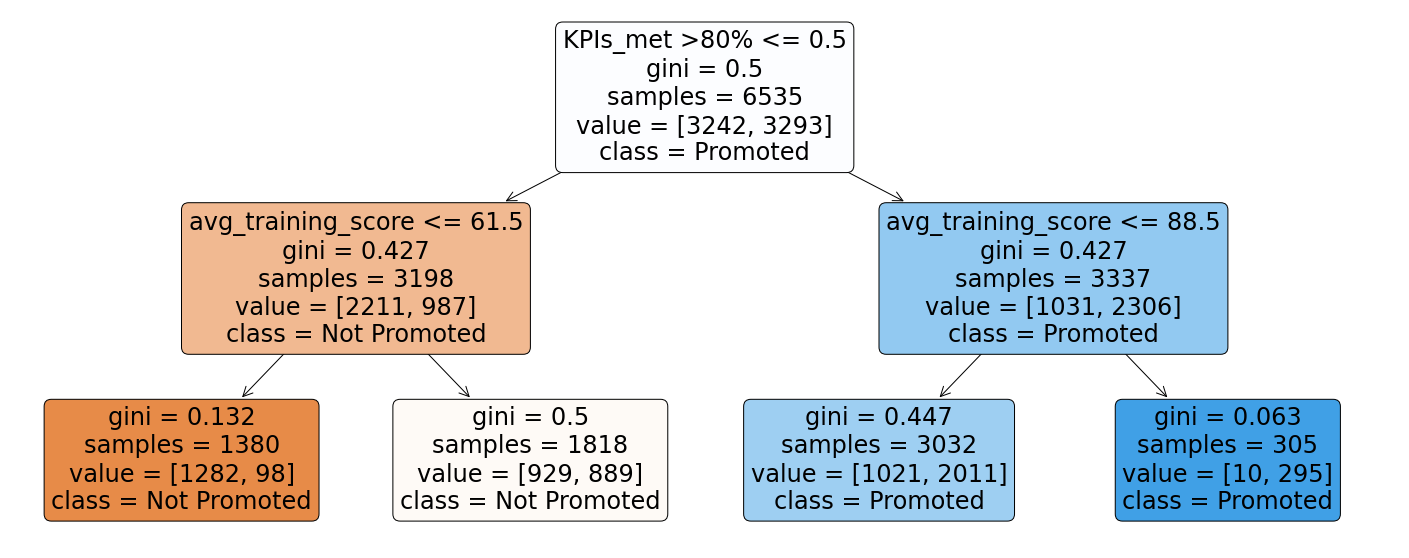

In [51]:
plt.figure(figsize=(25,10))
tree.plot_tree(dt,
              feature_names = list(hr_new.drop(['is_promoted'], axis=1)),
                class_names = ['Not Promoted', 'Promoted'],
                rounded = True,
                filled= True)
plt.show()     

In [52]:
#training accuracy 
train_acc = dt.score(dt_x_train, dt_y_train)
print('the training accuracy is: ', train_acc)

the training accuracy is:  0.6912012241775057


In [53]:
#testing accuracy 
test_acc = dt.score(dt_x_test, dt_y_test)
print('the testing accuracy is: ', test_acc)

the testing accuracy is:  0.6879685826490539


### 1.3 Evaluate and Improve the Model(s)

#### K-Fold Cross Validation

In [54]:
# Evaluate the Model using K-folds Cross validation
results  = cross_validate(dt, dt_x, dt_y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

# when k folds when data size is small and there is no overfit since there is a higher chance that all data parts might become train or test 

train_score:  [0.69469738 0.68871335 0.68884724 0.68737448 0.69152497]
test_score:  [0.67237687 0.69630423 0.69576861 0.70166042 0.68505624]


In [55]:
# The cross validation traning and testing accuracy will be an average of the 5 evaluation scores respectively
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

cross val training accuracy is: 0.6902314820558433
cross val testing accuracy is: 0.6902332751072671


#### GridSearch

In [56]:
dt = tree.DecisionTreeClassifier(max_depth = 2)

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10, 12, 16], 'max_depth' : [2,3,4,5,6,7]}

gs = GridSearchCV(dt, param_grid=param_grid, scoring='accuracy', cv= 10, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs = gs.fit(dt_x_train, dt_y_train) # 

print(gs.best_score_)
print(gs.best_params_)

0.7943404002229185
{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 16}


In [57]:
# Create Decision Tree using the best hyperparameters
dt_grid = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 7, min_samples_leaf = 1, min_samples_split =16, random_state=0)
dt_grid.fit(dt_x_train, dt_y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=16,
                       random_state=0)

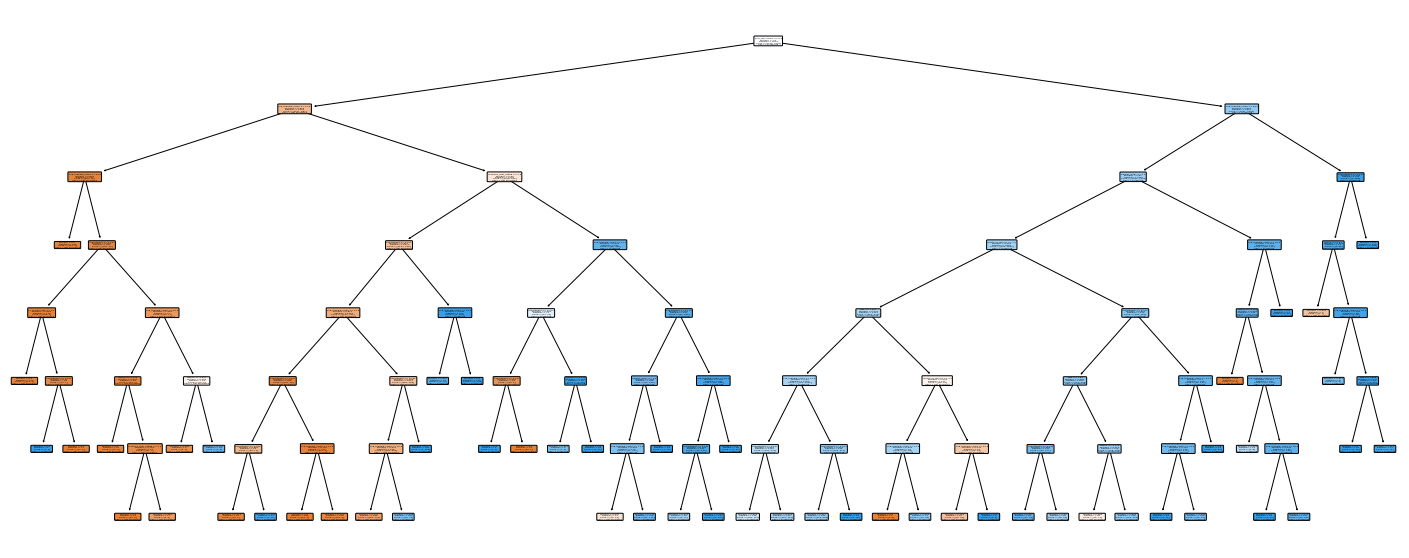

In [58]:
plt.figure(figsize=(25,10))
tree.plot_tree(dt_grid,feature_names = list(hr_new.drop(['is_promoted'], axis=1)),
                class_names = ['Not Promoted', 'Promoted'],
                rounded = True,
                filled= True)
plt.show() 

In [59]:
#Evaluate the Model
#training acc CLASSIFICATION
train_acc = dt_grid.score(dt_x_train, dt_y_train)
print('the training accuracy is: ', train_acc) 

the training accuracy is:  0.8041315990818668


In [60]:
#testing acc
test_acc = dt_grid.score(dt_x_test, dt_y_test)
print('the testing accuracy is: ', test_acc)

the testing accuracy is:  0.7890039271688682


#### Selecting Different Input Features eg P-value, Feature Importance 

In [61]:
# using feature importance 

In [62]:
# looking at x train again 

In [63]:
dt_x_train

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
6811,0.145065,0.034889,1,1,1,1,1.031841,4.0,7,1,0,79
3359,0.105126,0.041163,1,1,0,1,1.020144,3.0,5,0,0,87
1431,0.216067,0.021117,1,0,1,1,1.023087,5.0,2,1,0,92
4992,0.278500,0.025555,1,1,0,1,1.014878,1.0,3,0,0,53
6740,0.145065,0.021117,1,0,1,1,1.030948,4.0,9,0,0,77
...,...,...,...,...,...,...,...,...,...,...,...,...
7891,0.045295,0.216832,1,0,1,1,1.018514,4.0,2,1,1,68
9225,0.145065,0.050803,1,1,0,1,1.037014,3.0,14,0,0,80
4859,0.278500,0.216832,1,0,1,1,1.036373,3.0,14,1,0,48
3264,0.145065,0.216832,3,1,0,1,1.035703,3.0,12,0,0,80


In [64]:
dt_x_train.columns 

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object')

In [65]:
dt_grid.feature_importances_

array([0.23435475, 0.00865647, 0.        , 0.        , 0.        ,
       0.00101374, 0.00471338, 0.10823107, 0.00684593, 0.24816495,
       0.01166584, 0.37635387])

In [66]:
pd.concat((pd.DataFrame(dt_x_train.columns, columns = ['feature']), 
           pd.DataFrame(dt_grid.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)

# reduce the number of features by how important it is 

,feature,importance
11,avg_training_score,0.376354
9,KPIs_met >80%,0.248165
0,department,0.234355
7,previous_year_rating,0.108231
10,awards_won?,0.011666
1,region,0.008656
8,length_of_service,0.006846
6,age,0.004713
5,no_of_trainings,0.001014
2,education,0.000000


#### Adjusting Input Data

In [67]:
# Define new Model Inputs (X) and Output (y)
dt_x = hr_new[['avg_training_score','KPIs_met >80%','department','previous_year_rating','awards_won?','region','length_of_service']]
dt_y = hr_new["is_promoted"]

In [68]:
# Split the data into training and testing data
dt_x_train, dt_x_test, dt_y_train, dt_y_test = train_test_split(dt_x,dt_y, test_size=0.3, random_state=0)

In [69]:
# create new Decision Tree Model
dt2 = tree.DecisionTreeClassifier(max_depth=2)
dt2.fit(dt_x_train, dt_y_train)

DecisionTreeClassifier(max_depth=2)

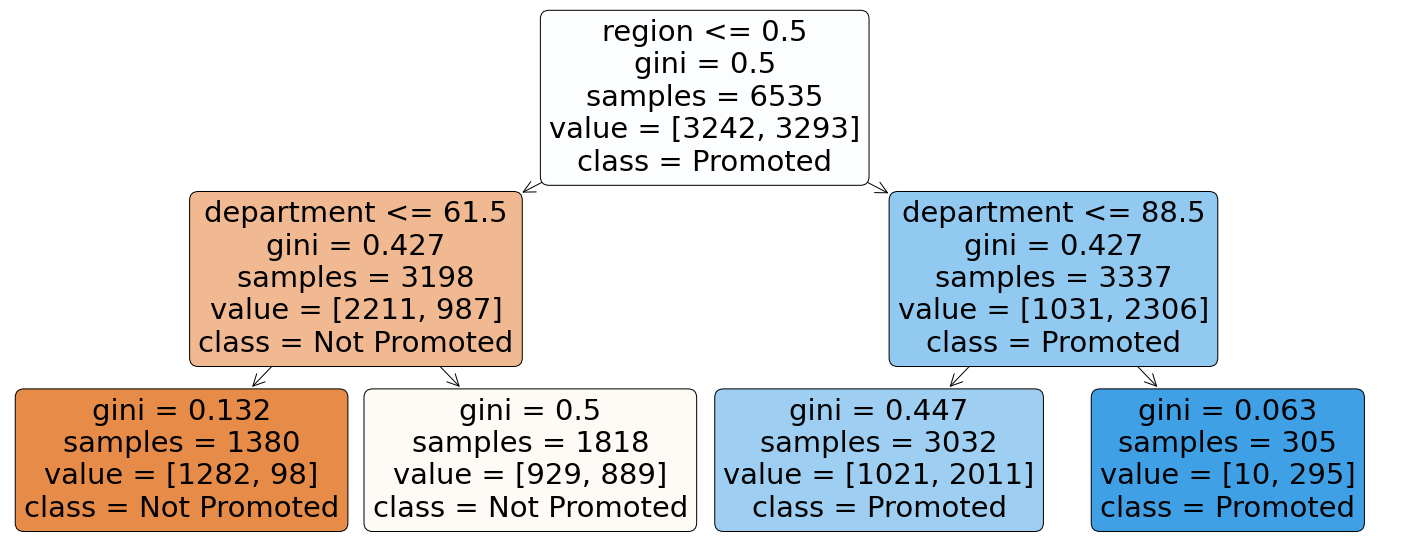

In [70]:
plt.figure(figsize=(25,10))
tree.plot_tree(dt2,
              feature_names = list(hr_new.drop(['is_promoted'], axis=1)),
                class_names = ['Not Promoted', 'Promoted'],
                rounded = True,
                filled= True)
plt.show()              

In [71]:
# new training accuracy 
train_acc = dt2.score(dt_x_train, dt_y_train)
print('the new training accuracy is: ', train_acc)

the new training accuracy is:  0.6912012241775057


In [72]:
# new testing accuracy
test_acc = dt2.score(dt_x_test, dt_y_test)
print('the new testing accuracy is: ', test_acc)

the new testing accuracy is:  0.6879685826490539


In [73]:
# GridSearchCV

In [74]:
dt_grid2 = tree.DecisionTreeClassifier(max_depth = 2)

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10, 12, 16], 'max_depth' : [2,3,4,5,6,7]}

gs = GridSearchCV(dt_grid2, param_grid=param_grid, scoring='accuracy', cv= 10, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs = gs.fit(dt_x_train, dt_y_train) # 

print(gs.best_score_)
print(gs.best_params_)

0.7986252581592368
{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 12}


In [75]:
# Create Decision Tree using the best hyperparameters
dt_final = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 7, min_samples_leaf = 1, min_samples_split =12, random_state=0)
dt_final.fit(dt_x_train, dt_y_train)

print('***Final Model***')
print('training acc: ', dt_final.score(dt_x_train, dt_y_train))
print('testing acc: ', dt_final.score(dt_x_test,dt_y_test))
results  = cross_validate(dt_final, dt_x, dt_y, scoring='accuracy', cv=5, return_train_score = True)
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

***Final Model***
training acc:  0.8032134659525632
testing acc:  0.7865048197072474
cross val training accuracy is: 0.7996197566617613
cross val testing accuracy is: 0.7873831416613812


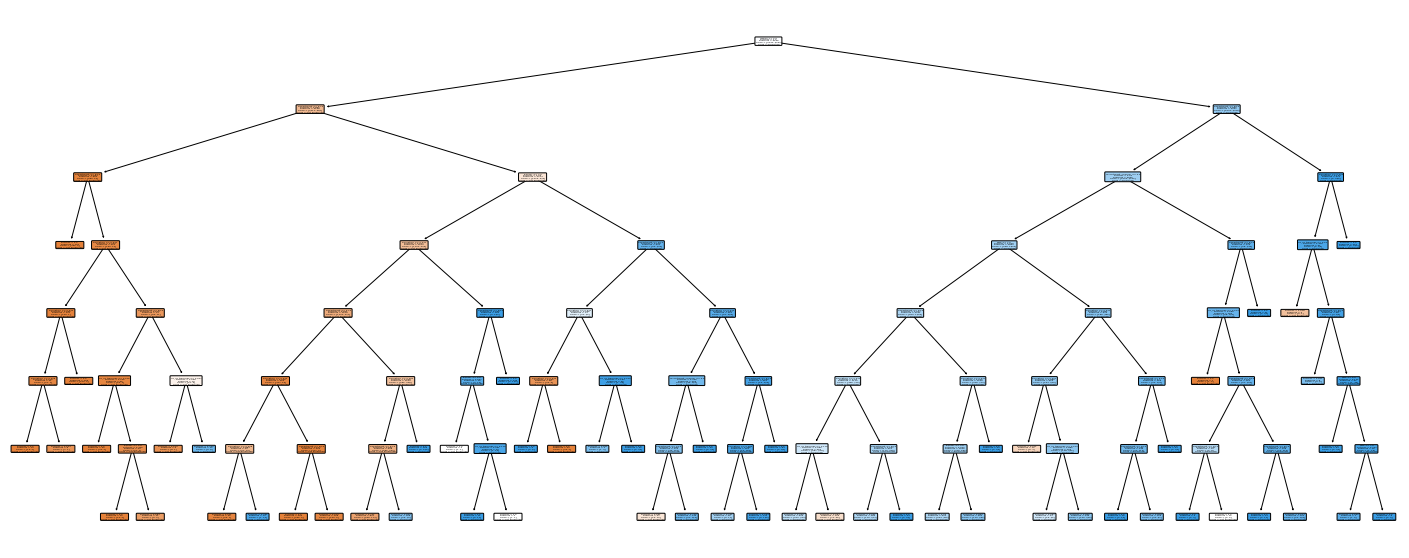

In [76]:
plt.figure(figsize=(25,10))
tree.plot_tree(dt_final,feature_names = list(hr_new.drop(['is_promoted'], axis=1)),
                class_names = ['Not Promoted', 'Promoted'],
                rounded = True,
                filled= True)
plt.show() 

## Model 4: ANN

#### Simple Split 

In [77]:
# Set the "is_promoted" as target/model output and the rest features as model inputs
# Separating into training and testing sets
ann_x = hr_new.drop(['is_promoted'], axis=1)
ann_y = hr_new['is_promoted'] 

ann_x_train, ann_x_test, ann_y_train, ann_y_test = train_test_split(ann_x,ann_y, test_size=0.3, random_state=0)

### 1.2 Build the Model(s)

In [78]:
# training the model using training set 

# Create the ann model
mlp = MLPClassifier(activation ='logistic', hidden_layer_sizes=(10,), max_iter= 2000, solver = 'sgd', random_state=0)
# Fit the model to the training set
mlp.fit(ann_x_train,ann_y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(10,), max_iter=2000,
              random_state=0, solver='sgd')

In [79]:
# print out the model coefficients and intercept
print(mlp.coefs_) # weighs 
print(mlp.intercepts_) # outputs (bias in output)

[array([[ 0.0291555 ,  0.12976403,  0.06204211,  0.02712049, -0.04603807,
         0.08792546, -0.03763628,  0.23566997,  0.27959837, -0.07027449],
       [ 0.17583107,  0.01742434,  0.04106172,  0.25666434, -0.2586744 ,
        -0.24898541, -0.28931845,  0.20049813,  0.16773437,  0.22312879],
       [ 0.28709189,  0.18040045, -0.0227336 ,  0.16955474, -0.2301905 ,
         0.08407579, -0.21506582,  0.26663757,  0.01317469, -0.05139692],
       [-0.14301964,  0.16536963, -0.02621233,  0.04144745, -0.29018096,
         0.07076087,  0.06759593,  0.0680755 ,  0.26758928,  0.1096861 ],
       [-0.08511274, -0.03797053,  0.11929243, -0.26511363,  0.10056333,
         0.10278709, -0.17464552, -0.2245856 , -0.11130071, -0.08215979],
       [ 0.04025737, -0.0370229 ,  0.29488005, -0.23965784, -0.17555545,
        -0.20453642,  0.09232726, -0.15356726, -0.02031564, -0.15402228],
       [-0.20700803, -0.23495073,  0.09459242, -0.21792642, -0.18296857,
        -0.07939837,  0.19356546, -0.2456827

In [80]:
# calculated the training accuracy
print(mlp.score(ann_x_train, ann_y_train), '(Train Accuracy)')

0.5219586840091813 (Train Accuracy)


In [81]:
# Calculated the fitted values for training set
y_fitted = mlp.predict(ann_x_train) # returns 0 or 1
y_fitted_prob = mlp.predict_proba(ann_x_train)[:,0] # returns probabilities

In [82]:
print(y_fitted)
print(y_fitted_prob)

[1 1 1 ... 0 1 1]
[0.49476914 0.48939245 0.48923154 ... 0.51824105 0.49443683 0.49646971]


In [83]:
# evaluation of model using the testing set 
# calculated the testing accuracy
print(mlp.score(ann_x_test, ann_y_test), '(Test Accuracy)')

0.520528382720457 (Test Accuracy)


### 1.3 Evaluate and Improve the Model(s)

#### K-Fold Cross Validation

In [84]:
# Evaluate the Model using K-folds Cross validation
ann_results  = cross_validate(mlp, ann_x, ann_y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', ann_results['train_score'])
print('test_score: ', ann_results['test_score'])

train_score:  [0.54445635 0.53755523 0.53367251 0.53849244 0.53715357]
test_score:  [0.51766595 0.54793787 0.55650777 0.53294055 0.5372255 ]


In [85]:
# Cross validation traning and testing accuracy will be an average of the 5 evaluation scores respectively
print('cross val training accuracy is:', sum(ann_results['train_score'])/len(ann_results['train_score']))
print('cross val testing accuracy is:', sum(ann_results['test_score'])/len(ann_results['test_score']))

cross val training accuracy is: 0.5382660183785536
cross val testing accuracy is: 0.5384555258754269


#### GridSearch 

In [86]:
# Using GridSearch to find the best combination of model hyperparameters
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter= 2000, random_state=0)

param_grid = { "activation" : ["logistic", "relu"],
              "hidden_layer_sizes" : [(5,), (10,), (20,)], 
              "max_iter" : [200, 2000, 4000],
              "solver" : ["sgd", "adam"] }

gs = GridSearchCV(mlp, param_grid=param_grid, scoring='accuracy', cv= 10, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs = gs.fit(ann_x_train, ann_y_train) # fitting the grid search into x and y training sets 

print(gs.best_score_) # ignore negative sign 
print(gs.best_params_)

0.7618989748561099
{'activation': 'logistic', 'hidden_layer_sizes': (10,), 'max_iter': 2000, 'solver': 'adam'}


In [87]:
#  Build the model using the above suggested hyperparameter values
mlp = MLPClassifier(activation = 'logistic', 
                   hidden_layer_sizes = (10,), 
                    max_iter = 2000, 
                    solver = 'adam', 
                    random_state = 0)

mlp.fit (ann_x_train, ann_y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(10,), max_iter=2000,
              random_state=0)

In [88]:
# Evaluating the model: train acc & test acc
print(mlp.score(ann_x_train, ann_y_train), '(Train Accuracy)')

print(mlp.score(ann_x_test, ann_y_test), '(Test Accuracy)')

0.7693955623565417 (Train Accuracy)
0.7668689753659408 (Test Accuracy)


### Comments: 
In summary, model accuracy for its Train and Test increased slightly by using Relu as activation, having (10,) hidden layers, a maximum iteration of 2000 and using the Adam solver. Specifically, Train Accuracy increased from 0.521 to 0.769 which is but a large increase, while the Test Accuracy increased from 0.520 to 0.766 and can also be seen as a large increase. Although improvement overall but the final performance can still be further refined through other means. Overall, the improvement is only exponenetial with the help of GridSearchCV

Possible ways to further improve model performance:

1) cleanse the data: filter out the outliers and scale the data 

2) add in more features from the original dataset 

3) Artificial Neural Network model may not be the best fit for this problem, so try other models to improve the model

#### Selecting Different Input Features eg P-value, Feature Importance 

### Comments: 
From the above model summary, we can see that RFA_2F, LASTGIFT and LASTDATE have close to ZERO p-value (i.e. the column P>|z|). It means we have very high confidence on the coefficients of these features, or say these features are the most strong indicators to predict TARGET_B.

On the other hand, AGE,AVGGIFT,NGIFTALL,TIMELAG, RAMNTALL and FISTDATE have very high p-value. It means we have very low confidence on the coeficients of these features and these features may not be the good indicators to predict TARGET_B.

#### Adjusting Input Data

In [89]:
mlp2 = sm.Logit(ann_y_train, ann_x_train).fit()

Optimization terminated successfully.
         Current function value: 0.525399
         Iterations 7


In [90]:
# Print out the Model Summary
mlp2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            is_promoted   No. Observations:                 6535
Model:                          Logit   Df Residuals:                     6523
Method:                           MLE   Df Model:                           11
Date:                Mon, 13 Feb 2023   Pseudo R-squ.:                  0.2420
Time:                        18:13:11   Log-Likelihood:                -3433.5
converged:                       True   LL-Null:                       -4529.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
department               7.0646      0.497     14.212      0.000       6.090       8.039
region                   1.3681      0.388      3.527      0.000       0.608       2.128
education                0.0644      0.032      1.983      0.047       0.001       0.128
gender                  -0.0608      0.065     -0.941      0.347      -0.187       0.066
recruitment_channel      0.0175      0.054      0.324      0.746      -0.088       0.123
no_of_trainings         -0.1934      0.054     -3.578      0.000      -0.299      -0.087
age                     -7.2087      0.286    -25.185      0.000      -7.770      -6.648
previous_year_rating     0.2288      0.021     10.942      0.000       0.188       0.270
length_of_service       -0.0115      0.009     -1.257      0.209      -0.029       0.006
KPIs_met >80%            1.7586      0.062     28.234      0.000       1.637       1.881
awards_won?              2.0186      0.172     11.723      0.000       1.681       2.356
avg_training_score       0.0670      0.003     23.514      0.000       0.061       0.073
========================================================================================
"""

In [91]:
# Define new Model Inputs (X) and Output (y)
ann_x = hr_new[['department','region','education','no_of_trainings','age','previous_year_rating','KPIs_met >80%','awards_won?','avg_training_score','length_of_service']]
ann_y = hr_new["is_promoted"]

ann_x_train, ann_x_test, ann_y_train, ann_y_test = train_test_split(ann_x,ann_y, test_size=0.3, random_state=0)

In [92]:
# training the model using training set 
# Create the ann model
mlp_new = MLPClassifier(activation ='logistic', hidden_layer_sizes=(10,), max_iter= 2000, solver = 'sgd', random_state=0)
# Fit the model to the training set
mlp_new.fit(ann_x_train,ann_y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(10,), max_iter=2000,
              random_state=0, solver='sgd')

In [93]:
# print out the model coefficients and intercept
print(mlp_new.coefs_) # weighs 
print(mlp_new.intercepts_) # outputs (bias in output)

[array([[ 0.03088484,  0.13573885,  0.06499302,  0.02841558, -0.04873369,
         0.09227357, -0.03997154,  0.24777813,  0.29181417, -0.07371795],
       [ 0.18450673,  0.01813508,  0.043035  ,  0.2691776 , -0.27146306,
        -0.26112075, -0.30362834,  0.21036653,  0.17570577,  0.23401535],
       [ 0.30278991,  0.18658982, -0.02436261,  0.17755468, -0.2442562 ,
         0.08850627, -0.22886003,  0.2812323 ,  0.00852273, -0.05397334],
       [-0.14883348,  0.1712069 , -0.02773299,  0.04346438, -0.30725937,
         0.0744136 ,  0.06752235,  0.07395525,  0.27040907,  0.11499212],
       [-0.08879645, -0.04147601,  0.12499242, -0.27800386,  0.10312388,
         0.10793081, -0.18575745, -0.23468683, -0.12364603, -0.08619721],
       [ 0.0445116 , -0.04259464,  0.30887344, -0.25142779, -0.18863416,
        -0.21418997,  0.09117891, -0.1560316 , -0.00731971, -0.16164013],
       [-0.21570649, -0.24617837,  0.09887121, -0.22892953, -0.1916178 ,
        -0.08302717,  0.20348078, -0.2548146

In [94]:
# calculated the training accuracy
print(mlp_new.score(ann_x_train,ann_y_train), '(Train Accuracy)')

0.540168324407039 (Train Accuracy)


In [95]:
# Calculated the fitted values for training set
y_fitted = mlp_new.predict(ann_x_train) # returns 0 or 1
y_fitted_prob = mlp_new.predict_proba(ann_x_train)[:,0] # returns probabilities

In [96]:
print(y_fitted)
print(y_fitted_prob)

[1 1 1 ... 1 1 1]
[0.49222181 0.49442429 0.49574619 ... 0.48903276 0.49019059 0.49635587]


In [97]:
# calculated the testing accuracy
print(mlp_new.score(ann_x_test, ann_y_test), '(Test Accuracy)')

0.5373081042484826 (Test Accuracy)


#### GridSearchCV

In [98]:
# Using GridSearch to find the best combination of model hyperparameters
mlp_grid2 = MLPClassifier(hidden_layer_sizes=(10,), max_iter= 2000, random_state=0)

param_grid = { "activation" : ["logistic", "relu"],
              "hidden_layer_sizes" : [(5,), (10,), (20,)], 
              "max_iter" : [200, 2000, 4000],
              "solver" : ["sgd", "adam"] }

gs = GridSearchCV(mlp_grid2, param_grid=param_grid, scoring='accuracy', cv= 10, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs = gs.fit(ann_x_train, ann_y_train) # fitting the grid search into x and y training sets 

print(gs.best_score_) # ignore negative sign 
print(gs.best_params_)

0.7635799954105025
{'activation': 'logistic', 'hidden_layer_sizes': (5,), 'max_iter': 2000, 'solver': 'adam'}


In [99]:
#  Build the model using the above suggested hyperparameter values
mlp_final = MLPClassifier(activation = 'logistic', 
                   hidden_layer_sizes = (5,), 
                    max_iter = 2000, 
                    solver = 'adam', 
                    random_state = 0)

mlp_final.fit (ann_x_train, ann_y_train)

print('***Final Model***')
print('training acc: ', mlp_final.score(ann_x_train, ann_y_train))
print('testing acc: ', mlp_final.score(ann_x_test,ann_y_test))
results  = cross_validate(mlp_final, ann_x, ann_y, scoring='accuracy', cv=5, return_train_score = True)
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

***Final Model***
training acc:  0.7704667176740627
testing acc:  0.7622277757943592
cross val training accuracy is: 0.7691731644519899
cross val testing accuracy is: 0.7666041778253884


### Further Improvements (After Presentation)

## Model 5: XGBoost - eXtreme Gradient Boosting

#### Simple Split Train Test 

In [100]:
# Set the "is_promoted" as target/model output and the rest features as model inputs
# Separating into training and testing sets
xgb_x = hr_new.drop(['is_promoted'], axis=1)
xgb_y = hr_new['is_promoted'] 

xgb_x_train, xgb_x_test, xgb_y_train, xgb_y_test = train_test_split(xgb_x, xgb_y, test_size=0.3, random_state=0)

#### Build the Model

In [101]:
# Build XGBoost Model and Evaluate both training and testing accuracy 
xgb = XGBClassifier(n_estimators=20, learning_rate=0.1, eval_metric='logloss')
xgb.fit(xgb_x_train, xgb_y_train)

print('training accuracy is: ', xgb.score(xgb_x_train,xgb_y_train))
print('testing accuracy is: ', xgb.score(xgb_x_test,xgb_y_test))

training accuracy is:  0.8206579954093344
testing accuracy is:  0.7997143877186719


### 1.3 Evaluate and Improve the Model(s)

#### K-Folds Cross Validation

In [102]:
# Evaluate the Model using K-folds Cross validation
xgb_results = cross_validate(xgb, xgb_x, xgb_y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', xgb_results['train_score'])
print('test_score: ', xgb_results['test_score'])

train_score:  [0.82043385 0.81858348 0.81871737 0.81403133 0.82273397]
test_score:  [0.80139186 0.81681843 0.81199786 0.81092662 0.79807177]


In [103]:
print('cross val training accuracy is:', sum(xgb_results['train_score'])/len(xgb_results['train_score']))
print('cross val testing accuracy is:', sum(xgb_results['test_score'])/len(xgb_results['test_score']))

cross val training accuracy is: 0.818899998228708
cross val testing accuracy is: 0.8078413077811512


#### GridSearch

In [104]:
# Grid Search

xgb_grid = XGBClassifier(n_estimators=20, learning_rate=0.1, eval_metric='logloss')

param_grid = {"eval_metric": ["logloss", "mlogloss","mape"],
              'n_estimators': [10,20,50,100,200],
              'learning_rate': [0.02, 0.05, 0.1, 0.5, 1]}

gs = GridSearchCV(estimator=xgb_grid, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(xgb_x_train, xgb_y_train)

print(gs.best_score_)
print(gs.best_params_)

0.8137719969395564
{'eval_metric': 'logloss', 'learning_rate': 0.5, 'n_estimators': 10}


In [105]:
# Build XGBoost Model and Evaluate both training and testing accuracy 
xgb2 = XGBClassifier(n_estimators=10, learning_rate=0.5, eval_metric='logloss')
xgb2.fit(xgb_x_train, xgb_y_train)

print('training accuracy is: ', xgb.score(xgb_x_train,xgb_y_train))
print('testing accuracy is: ', xgb.score(xgb_x_test,xgb_y_test))

training accuracy is:  0.8206579954093344
testing accuracy is:  0.7997143877186719


#### Adjusting the Input Data 

In [106]:
xgb2.feature_importances_

array([0.11178452, 0.01195162, 0.01099283, 0.01629383, 0.01251355,
       0.00768325, 0.01384876, 0.08372614, 0.01558118, 0.5417979 ,
       0.0813787 , 0.09244772], dtype=float32)

In [107]:
pd.concat((pd.DataFrame(xgb_x_train.columns, columns = ['feature']), 
           pd.DataFrame(xgb2.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)

# reduce the number of features by how important it is 

,feature,importance
9,KPIs_met >80%,0.541798
0,department,0.111785
11,avg_training_score,0.092448
7,previous_year_rating,0.083726
10,awards_won?,0.081379
3,gender,0.016294
8,length_of_service,0.015581
6,age,0.013849
4,recruitment_channel,0.012514
1,region,0.011952


In [108]:
# Define new Model Inputs (X) and Output (y)
xgb_x = hr_new[['KPIs_met >80%','department','avg_training_score','previous_year_rating','awards_won?','gender','length_of_service','age','recruitment_channel','region','education']]
xgb_y = hr_new["is_promoted"]

xgb_x_train, xgb_x_test, xgb_y_train, xgb_y_test = train_test_split(xgb_x, xgb_y, test_size=0.3, random_state=0)

In [109]:
# Build XGBoost Model and Evaluate both training and testing accuracy 
xgb_final = XGBClassifier(n_estimators=10, learning_rate=0.5, eval_metric='logloss')
xgb_final.fit(xgb_x_train, xgb_y_train)

print('training accuracy is: ', xgb_final.score(xgb_x_train,xgb_y_train))
print('testing accuracy is: ', xgb_final.score(xgb_x_test,xgb_y_test))

training accuracy is:  0.8457536342769701
testing accuracy is:  0.8082827561585149


In [110]:
# GridSearchCV

In [111]:
xgb_grid2 = XGBClassifier(n_estimators=20, learning_rate=0.1, eval_metric='logloss')

param_grid = {"eval_metric": ["logloss", "mlogloss","mape"],
              'n_estimators': [10,20,50,100,200],
              'learning_rate': [0.02, 0.05, 0.1, 0.5, 1]}

gs = GridSearchCV(estimator=xgb_grid2, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(xgb_x_train, xgb_y_train)

print(gs.best_score_)
print(gs.best_params_)

0.8149961744452945
{'eval_metric': 'logloss', 'learning_rate': 0.05, 'n_estimators': 200}


In [112]:
# Build XGBoost Model and Evaluate both training and testing accuracy 
xgb_final = XGBClassifier(n_estimators=200, learning_rate=0.05, eval_metric='logloss')
xgb_final.fit(xgb_x_train, xgb_y_train)

print('***Final Model***')
print('training acc: ', xgb_final.score(xgb_x_train, xgb_y_train))
print('testing acc: ', xgb_final.score(xgb_x_test,xgb_y_test))
results  = cross_validate(xgb_final, xgb_x, xgb_y, scoring='accuracy', cv=5, return_train_score = True)
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

***Final Model***
training acc:  0.8745218056618209
testing acc:  0.8022134951802927
cross val training accuracy is: 0.866939776715369
cross val testing accuracy is: 0.814589127744472


## Model 6: Ada Boost 

#### Simple Train-Test Split

In [113]:
# Set the "is_promoted" as target/model output and the rest features as model inputs
# Separating into training and testing sets
ada_x = hr_new.drop(['is_promoted'], axis=1)
ada_y = hr_new['is_promoted'] 

ada_x_train, ada_x_test, ada_y_train, ada_y_test = train_test_split(ada_x, ada_y, test_size=0.3, random_state=0)

### 1.2 Build the Model

In [114]:
# Build Ada Boost Model and Evaluate both training and testing accuracy
# train and add more weights 
abd = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=20, learning_rate=0.1)
abd.fit(ada_x_train,ada_y_train)

print('training accuracy is: ', abd.score(ada_x_train,ada_y_train))
print('testing accuracy is: ', abd.score(ada_x_test,ada_y_test))

training accuracy is:  0.7993879112471308
testing accuracy is:  0.7857907890039272


### 1.3 Evaluation and Improve Model(s)

#### K-Fold Cross Validation

In [115]:
# Evaluate the Model using K-folds Cross validation
results  = cross_validate(abd, ada_x, ada_y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

train_score:  [0.79673273 0.79220779 0.79301111 0.79368055 0.79863436]
test_score:  [0.78640257 0.79914301 0.80235672 0.79967863 0.7787895 ]


In [116]:
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

cross val training accuracy is: 0.7948533065397322
cross val testing accuracy is: 0.7932740864949552


#### GridSearchCV

In [117]:
# Grid Search

abd_grid = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=20, learning_rate=0.1)

param_grid = {"learning_rate" : [0.02, 0.05, 0.1, 0.5, 1], 
              "n_estimators": [10, 20, 50, 100]}

gs = GridSearchCV(estimator=abd_grid, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(ada_x_train,ada_y_train)

print(gs.best_score_)
print(gs.best_params_)

0.8133129303749044
{'learning_rate': 0.1, 'n_estimators': 100}


In [118]:
# Build Ada Boost Model and Evaluate both training and testing accuracy
# train and add more weights 
abd2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=100, learning_rate=0.1)
abd2.fit(ada_x_train,ada_y_train)

print('training accuracy is: ', abd2.score(ada_x_train,ada_y_train))
print('testing accuracy is: ', abd2.score(ada_x_test,ada_y_test))

training accuracy is:  0.8324407039020658
testing accuracy is:  0.8093538022134952


#### Selecting Different Input Features 

In [119]:
# using Feature Importance

In [120]:
abd2.feature_importances_

array([0.20620847, 0.06795073, 0.02300816, 0.00825563, 0.00828276,
       0.01198722, 0.06412508, 0.11071281, 0.04090152, 0.15437996,
       0.03252556, 0.2716621 ])

In [121]:
pd.concat((pd.DataFrame(ada_x_train.columns, columns = ['feature']), 
           pd.DataFrame(abd2.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)

# reduce the number of features by how important it is 

,feature,importance
11,avg_training_score,0.271662
0,department,0.206208
9,KPIs_met >80%,0.154380
7,previous_year_rating,0.110713
1,region,0.067951
6,age,0.064125
8,length_of_service,0.040902
10,awards_won?,0.032526
2,education,0.023008
5,no_of_trainings,0.011987


In [122]:
# Define new Model Inputs (X) and Output (y)
ada_x = hr_new[["avg_training_score", "department", "KPIs_met >80%", "previous_year_rating", "region", "age", "length_of_service", "awards_won?", "education", "no_of_trainings"]]
ada_y = hr_new["is_promoted"]

ada_x_train, ada_x_test, ada_y_train, ada_y_test = train_test_split(ada_x, ada_y, test_size=0.3, random_state=0)

In [123]:
abd_new = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=20, learning_rate=0.1)
abd_new.fit(ada_x_train, ada_y_train)

print('training accuracy is: ', abd_new.score(ada_x_train,ada_y_train))
print('testing accuracy is: ', abd_new.score(ada_x_test,ada_y_test))

training accuracy is:  0.7993879112471308
testing accuracy is:  0.7857907890039272


In [124]:
# Grid Search

abd_grid2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=20, learning_rate=0.1)

param_grid = {"learning_rate" : [0.02, 0.05, 0.1, 0.5, 1], 
              "n_estimators": [10, 20, 50, 100]}

gs = GridSearchCV(estimator=abd_grid2, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(ada_x_train,ada_y_train)

print(gs.best_score_)
print(gs.best_params_)

0.8165263963274674
{'learning_rate': 0.1, 'n_estimators': 100}


In [125]:
# Build Ada Boost Model and Evaluate both training and testing accuracy
# train and add more weights 
abd_final = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=100, learning_rate=0.1)
abd_final.fit(ada_x_train,ada_y_train)

print('***Final Model***')
print('training acc: ', abd_final.score(ada_x_train,ada_y_train))
print('testing acc: ', abd_final.score(ada_x_test,ada_y_test))
results  = cross_validate(abd_final, ada_x, ada_y, scoring='accuracy', cv=5, return_train_score = True)
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

***Final Model***
training acc:  0.8335118592195868
testing acc:  0.8075687254551945
cross val training accuracy is: 0.8293969940958604
cross val testing accuracy is: 0.8129830173336284


## Model 7: SVM - Support Vector Machine 

#### Simple Train and Test Split

In [126]:
# Set the "is_promoted" as target/model output and the rest features as model inputs
# Separating into training and testing sets
svc_x = hr_new.drop(['is_promoted'], axis=1)
svc_y = hr_new['is_promoted'] 

svc_x_train, svc_x_test, svc_y_train, svc_y_test = train_test_split(svc_x, svc_y, test_size=0.3, random_state=0)

### 1.2 Build the Model 

In [127]:
svc = svm.SVC(kernel='linear', gamma = 0.001, C = 0.1)
svc.fit(svc_x_train, svc_y_train)

print('training accuracy is: ', svc.score(svc_x_train, svc_y_train))
print('testing accuracy is: ', svc.score(svc_x_test, svc_y_test))

training accuracy is:  0.7141545524100995
testing accuracy is:  0.7115315958586219


### 1.3 Evaluate and Improve Model

#### K-folds Cross Validation

In [128]:
results  = cross_validate(svc, svc_x, svc_y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.71732726 0.71334851 0.71013523 0.71000134 0.71602624]
test_score:  [0.69753747 0.71344403 0.72629888 0.72683449 0.70273166]
cross val training accuracy is: 0.7133677152835183
cross val testing accuracy is: 0.7133693050376826


#### GridSearchCV

In [129]:
# Grid Search
svc_grid = svm.SVC(kernel='linear', gamma = 0.001, C = 0.1)

param_grid = {'kernel': ['linear', 'rbf'], 
             'C': [0.001, 0.01, 0.1], 
             'gamma':[0.001, 0.01, 0.1]}

gs = GridSearchCV(estimator=svc_grid, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(svc_x_train, svc_y_train)

print(gs.best_score_)
print(gs.best_params_)

0.7141545524100996
{'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}


In [130]:
# gridsearch gave the same hyperparameters already used 
svc2 = svm.SVC(kernel='linear', gamma = 0.001, C = 0.1)
svc2.fit(svc_x_train, svc_y_train)

print('training accuracy is: ', svc2.score(svc_x_train, svc_y_train))
print('testing accuracy is: ', svc2.score(svc_x_test, svc_y_test))

training accuracy is:  0.7141545524100995
testing accuracy is:  0.7115315958586219


#### Selecting Different Input Features 

In [131]:
# Create another model lm2 using statsmodel.api: the Ordinary Least Squares (OLS) method and fit function
svc3 = sm.OLS(svc_y_train, svc_x_train).fit() # fit the training and testing 
# Summary statistics from the model
svc3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            is_promoted   R-squared (uncentered):                   0.645
Model:                            OLS   Adj. R-squared (uncentered):              0.644
Method:                 Least Squares   F-statistic:                              987.1
Date:                Mon, 13 Feb 2023   Prob (F-statistic):                        0.00
Time:                        18:27:15   Log-Likelihood:                         -3650.5
No. Observations:                6535   AIC:                                      7325.
Df Residuals:                    6523   BIC:                                      7406.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
department               1.0759      0.076     14.183      0.000       0.927       1.225
region                   0.2556      0.069      3.720      0.000       0.121       0.390
education                0.0099      0.006      1.718      0.086      -0.001       0.021
gender                  -0.0112      0.012     -0.967      0.334      -0.034       0.011
recruitment_channel      0.0034      0.010      0.352      0.725      -0.015       0.022
no_of_trainings         -0.0324      0.009     -3.517      0.000      -0.050      -0.014
age                     -0.7279      0.041    -17.720      0.000      -0.808      -0.647
previous_year_rating     0.0432      0.004     11.645      0.000       0.036       0.050
length_of_service       -0.0027      0.002     -1.676      0.094      -0.006       0.000
KPIs_met >80%            0.3429      0.011     31.650      0.000       0.322       0.364
awards_won?              0.2657      0.021     12.401      0.000       0.224       0.308
avg_training_score       0.0111      0.000     26.288      0.000       0.010       0.012
==============================================================================
Omnibus:                     1630.329   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.900
Skew:                          -0.118   Prob(JB):                     5.57e-65
Kurtosis:                       1.985   Cond. No.                     1.08e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [132]:
# Define new Model Inputs (X) and Output (y)
svc_x = hr_new[["department", "region", "education", "no_of_trainings", "age", "previous_year_rating", "length_of_service", "KPIs_met >80%", "awards_won?", "avg_training_score"]]
svc_y = hr_new["is_promoted"]

svc_x_train, svc_x_test, svc_y_train, svc_y_test = train_test_split(svc_x, svc_y, test_size=0.3, random_state=0)

In [133]:
svc_new = svm.SVC(kernel='linear', gamma = 0.001, C = 0.1)
svc_new.fit(svc_x_train, svc_y_train)

print('training accuracy is: ', svc_new.score(svc_x_train, svc_y_train))
print('testing accuracy is: ', svc_new.score(svc_x_test, svc_y_test))

training accuracy is:  0.7141545524100995
testing accuracy is:  0.7115315958586219


In [134]:
# Grid Search
svc_grid2 = svm.SVC(kernel='linear', gamma = 0.001, C = 0.1)

param_grid = {'kernel': ['linear', 'rbf'], 
             'C': [0.001, 0.01, 0.1], 
             'gamma':[0.001, 0.01, 0.1]}

gs = GridSearchCV(estimator=svc_grid2, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(svc_x_train, svc_y_train)

print(gs.best_score_)
print(gs.best_params_)

0.7141545524100996
{'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}


In [135]:
# Build svm Model and Evaluate both training and testing accuracy

svc_final = svm.SVC(kernel='linear', gamma = 0.001, C = 0.1)
svc_final.fit(svc_x_train, svc_y_train)

print('***Final Model***')
print('training acc: ', svc_final.score(svc_x_train, svc_y_train))
print('testing acc: ', svc_final.score(svc_x_test,svc_y_test))
results  = cross_validate(svc_final, svc_x, svc_y, scoring='accuracy', cv=5, return_train_score = True)
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

***Final Model***
training acc:  0.7141545524100995
testing acc:  0.7115315958586219
cross val training accuracy is: 0.7133677152835183
cross val testing accuracy is: 0.7133693050376826


## 2. Airbnb

### Model 1: Linear Regression 

In [136]:
# mse lower better 
# can use rmse, mse and r^2, mae 
# max=2 is underfit and max=9 is overfit, performance is not good 
# mse is more sensitive to outliers than mae since the error difference is squared (higher impact) whereas the mae is just the difference 
# rmse is sqroot of mae 

### 2.1 Load and Sample the data

In [137]:
# Load dataset into a DataFrame
df_airbnb = pd.read_csv('listings_new.csv')

# Create a copy of the DataFrame
airbnb_new = df_airbnb.copy()

# Show overview of the dataset
airbnb_new.head()

,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
0,0.167346,1.31600,103.85716,0,1.225094,0,-0.527652,4.965264,358,119.0
1,0.066123,1.30024,103.85846,0,1.971941,1,-1.245826,2.122822,262,92.0
2,0.084692,1.32737,103.85024,0,0.909227,2,0.722171,5.317876,334,178.0
3,0.028986,1.29097,103.84122,0,0.614239,5,-0.803453,4.550045,359,394.0
4,0.084692,1.32761,103.84858,1,0.000000,0,-0.527652,0.000000,365,219.0


In [138]:
airbnb_new.describe()

,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
count,6309.000000,6309.000000,6309.000000,6309.000000,6309.000000,6309.000000,6309.000000,6309.000000,6309.000000,6309.000000
mean,0.092002,1.303630,103.850989,0.462672,0.968999,13.037724,-0.526992,2.697315,215.435727,156.292281
std,0.052387,0.016459,0.025049,0.599151,0.747141,29.313302,0.903554,1.901781,143.593737,98.722597
min,0.000226,1.243870,103.763270,0.000000,0.000000,0.000000,-2.283722,0.000000,0.000000,35.000000
25%,0.057292,1.290980,103.839270,0.000000,0.614239,0.000000,-0.962683,1.110642,63.000000,81.000000
50%,0.078578,1.306000,103.849320,0.000000,0.909227,2.000000,-0.527652,2.709189,269.000000,135.000000
75%,0.155344,1.314480,103.862200,1.000000,1.571413,11.000000,-0.072262,4.384589,355.000000,208.000000
max,0.167346,1.365830,103.918220,2.000000,2.568582,307.000000,1.260680,5.936771,365.000000,394.000000


In [139]:
airbnb_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6309 entries, 0 to 6308
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   6309 non-null   float64
 1   latitude                        6309 non-null   float64
 2   longitude                       6309 non-null   float64
 3   room_type                       6309 non-null   int64  
 4   minimum_nights                  6309 non-null   float64
 5   number_of_reviews               6309 non-null   int64  
 6   reviews_per_month               6309 non-null   float64
 7   calculated_host_listings_count  6309 non-null   float64
 8   availability_365                6309 non-null   int64  
 9   price                           6309 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 493.0 KB


#### Simple train-test split 

In [140]:
# Define Model Inputs (X) and Output (y)
# Set the "" as target/model output and the rest features as model inputs
# Separating into training and testing sets
lr_x = airbnb_new.drop(['price'], axis=1)
lr_y = airbnb_new['price'] 

lr_x_train, lr_x_test, lr_y_train, lr_y_test = train_test_split(lr_x,lr_y, test_size=0.3, random_state=0)

### 2.2 Build the Model(s)

In [141]:
# training the model using the training set 
lm = LinearRegression()
lm.fit(lr_x_train,lr_y_train)

LinearRegression()

In [142]:
# print out the model coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[-1.29266767e+02 -2.36554489e+02 -3.00675704e+01 -1.03946247e+02
 -2.76493214e+01 -3.51206884e-01  3.99666759e+00 -3.78730053e+00
  1.35131893e-01]
3660.738920238324


In [143]:
# Calculated the fitted values for training set
y_fitted = lm.predict(lr_x_train)

# X.train is y.fitted & X.test is y.predict 
# Calculated the MSE, RMSE and R^2 for training set
print(sqrt(mean_squared_error(y_fitted, lr_y_train)), '(Train RMSE)') # RMSE: the lower the better
print(lm.score(lr_x_train,lr_y_train), '(Train R^2 Value)') # R squared value (ranges from 0 to 1): the higher the better
print(mean_squared_error(lm.predict(lr_x_train),lr_y_train), '(Train MSE)') # MSE: lower better 

76.9136897002697 (Train RMSE)
0.3838816366971005 (Train R^2 Value)
5915.715663309373 (Train MSE)


In [144]:
# calculated the predicated value for testing data
y_pred = lm.predict(lr_x_test)

# Calculated the MSE, RMSE and R^2 for testing set
print(mean_squared_error(lm.predict(lr_x_test),lr_y_test), '(Test MSE)') # MSE: lower better 
print(sqrt(mean_squared_error(y_pred, lr_y_test)), '(Test RMSE)') # RMSE: the lower the better
print(lm.score(lr_x_test,lr_y_test), '(Test R^2 Value)') # R squared value (ranges from 0 to 1): the higher the better, nearer to 

6429.864941668909 (Test MSE)
80.18643863939157 (Test RMSE)
0.36173252349278173 (Test R^2 Value)


### 2.3 Evaluate and Improve the Model(s)

In [145]:
# K-folds Cross Validation

In [146]:
# Evaluate the Model using K-folds Cross validation
lr_results  = cross_validate(lm, lr_x, lr_y, scoring='neg_mean_absolute_error', cv=5, return_train_score = True)
print('train_score: ', lr_results['train_score'])
print('test_score: ', lr_results['test_score'])

train_score:  [-59.71856183 -59.73924738 -59.34325238 -58.22980266 -59.04360675]
test_score:  [-57.86239346 -57.65488476 -58.75958708 -62.2967939  -59.93026959]


In [147]:
# cross validation traning and testing accuracy will be an average of the 5 evaluation scores respectively
print('cross val training accuracy is:', sum(-lr_results['train_score'])/len(lr_results['train_score']))
print('cross val testing accuracy is:', sum(-lr_results['test_score'])/len(lr_results['test_score']))

cross val training accuracy is: 59.214894200883656
cross val testing accuracy is: 59.300785758551115


comments: for the dataset's RMSE scoring, the initial result from a simple train test split was 80.2. In comparison, the K-folds cross validation's RMSE had a significantly lower score of 59.2. Since the RMSE score for both tests can still be considered high, more improvement to the model must be made for the model to be valid for this dataset.

In [148]:
# Tuning Model Hyperparameters using GridSearch 

Linear Regression Model has no hyper parametars to be tuned as it has already found out the best line or hyperlane which minimizes RMSE. To further improve the model, we need to utimize statsmodel package to find out the p-values for each coefficient so as to understand our confidence levels on each coefficient.

In [149]:
## Selecting Different Features 

In [150]:
# Create another model lm2 using statsmodel.api: the Ordinary Least Squares (OLS) method and fit function
lm2 = sm.OLS(lr_y_train,lr_x_train).fit() # fit the training and testing 

In [151]:
# Summary statistics from the model
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.825
Model:                            OLS   Adj. R-squared (uncentered):              0.825
Method:                 Least Squares   F-statistic:                              2308.
Date:                Mon, 13 Feb 2023   Prob (F-statistic):                        0.00
Time:                        18:29:06   Log-Likelihood:                         -25443.
No. Observations:                4416   AIC:                                  5.090e+04
Df Residuals:                    4407   BIC:                                  5.096e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
neighbourhood                   -138.3154     24.051     -5.751      0.000    -185.468     -91.162
latitude                        -243.8361     74.466     -3.274      0.001    -389.826     -97.846
longitude                          5.2807      0.930      5.679      0.000       3.458       7.104
room_type                       -103.8708      2.118    -49.050      0.000    -108.023     -99.719
minimum_nights                   -27.5749      1.700    -16.225      0.000     -30.907     -24.243
number_of_reviews                 -0.3527      0.048     -7.302      0.000      -0.447      -0.258
reviews_per_month                  3.9569      1.543      2.564      0.010       0.932       6.982
calculated_host_listings_count    -3.8290      0.741     -5.168      0.000      -5.281      -2.377
availability_365                   0.1356      0.009     14.737      0.000       0.118       0.154
==============================================================================
Omnibus:                      707.146   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1157.801
Skew:                           1.076   Prob(JB):                    3.86e-252
Kurtosis:                       4.289   Cond. No.                     1.78e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the above model summary, we can see that most of the columns have close to ZERO p-value (i.e. the column P>|t|). It means we have very high confidence on the coefficients of these features, or say these features are the most strong indicators to predict the target column **price**.

On the other hand, there are not any columns with very high p-value. It means we have very low confidence on the coeficients of these features and these features may not be the good indicators to predict TARGET_D.

Although the test RMSE for the model seems to be very high, this could be because there is simply not enough data for the model to be able learn. 

## Model 2: Decision Tree 

#### Simple train-test split

In [152]:
# Define Model Inputs (X) and Output (y)
# Set the "" as target/model output and the rest features as model inputs
# Separating into training and testing sets
dtreg_x = airbnb_new.drop(['price'], axis=1)
dtreg_y = airbnb_new['price'] 

dtreg_x_train, dtreg_x_test, dtreg_y_train, dtreg_y_test = train_test_split(dtreg_x,dtreg_y, test_size=0.3, random_state=0)

### 2.2 Build the Model(s)

In [153]:
# Create Decision Tree Model
tree_reg = tree.DecisionTreeRegressor(max_depth=2, random_state=0)
tree_reg.fit(dtreg_x_train, dtreg_y_train)

DecisionTreeRegressor(max_depth=2, random_state=0)

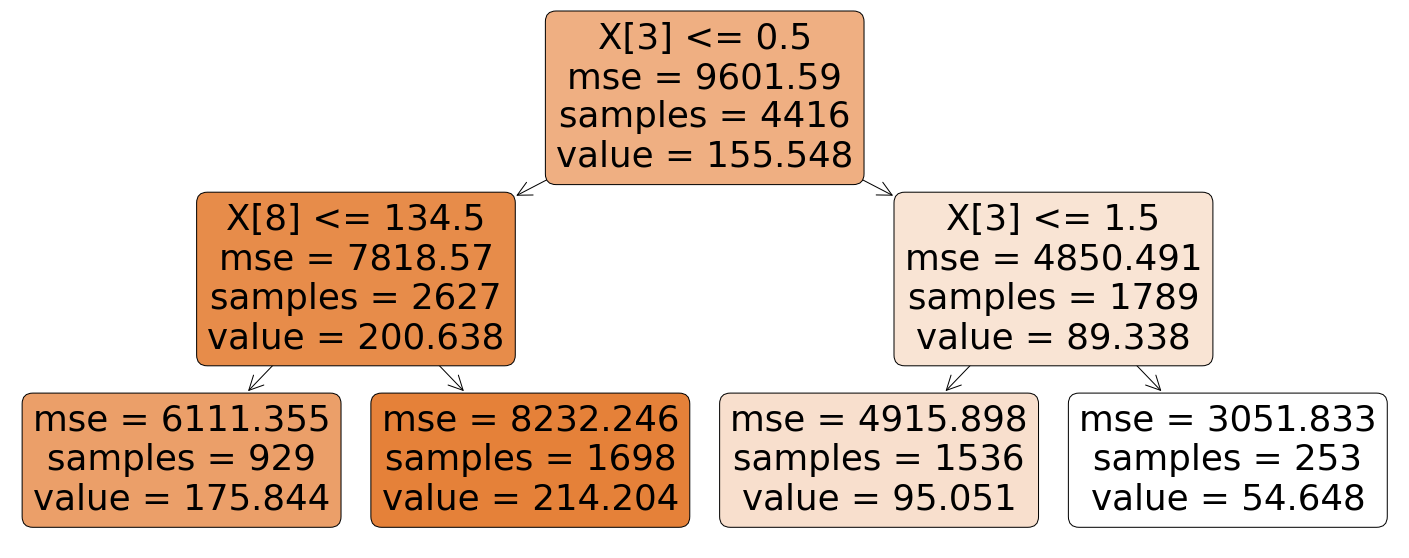

In [154]:
plt.figure(figsize=(25,10))
tree.plot_tree(tree_reg,
                rounded = True,
                filled= True)
plt.show() 

In [155]:
#training mse
train_mse = mean_squared_error(tree_reg.predict(dtreg_x_train), dtreg_y_train)
print('the training mean squared error is: ', train_mse)

#testing mse
test_mse = mean_squared_error(tree_reg.predict(dtreg_x_test), dtreg_y_test)
print('the testing mean squared error is: ',test_mse)

the training mean squared error is:  6335.7641513958
the testing mean squared error is:  6816.4937956235935


In [156]:
# Calculated the RMSE for train and test set
train_rmse = sqrt(mean_squared_error(tree_reg.predict(dtreg_x_train), dtreg_y_train))
print('the training RMSE is: ', train_rmse) # RMSE: the lower the better

test_rmse = sqrt(mean_squared_error(tree_reg.predict(dtreg_x_test), dtreg_y_test))
print('the testing RMSE is: ', test_rmse) # RMSE: the lower the better

the training RMSE is:  79.59751347495599
the testing RMSE is:  82.56206026755626


In [157]:
#the score function for regressor is calculating R Squared Value of the regression model
# R Squared value rangs from 0 to 1 and the higher the better
train_R2 = tree_reg.score(dtreg_x_train, dtreg_y_train)
print('training R^2 value is: ', train_R2)

test_R2 = tree_reg.score(dtreg_x_test, dtreg_y_test)
print('testing R^2 value is: ', test_R2)

training R^2 value is:  0.34013382971699135
testing R^2 value is:  0.32335339341816416


### 2.3 Evaluate and Improve the Model(s) 

In [158]:
# K-folds Cross Validation

In [159]:
# Evaluate the Model using K-folds Cross validation
results  = cross_validate(tree_reg, dtreg_x, dtreg_y, scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

train_score:  [-6553.36135585 -6555.84494387 -6410.00754222 -6285.99495149
 -6504.25685629]
test_score:  [-6161.22705468 -6174.25892547 -6725.49133506 -7237.01301596
 -6389.05625418]


In [160]:
print('cross val training accuracy is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(-results['test_score'])/len(results['test_score']))

cross val training accuracy is: 6461.893129942946
cross val testing accuracy is: 6537.409317069605


In [161]:
# GridSearch

In [162]:
# Use GridSearch to find the best combination of model hyperparameters

tree_reg_grid = tree.DecisionTreeRegressor(max_depth = 2)

param_grid = { "criterion" : ["mse", "mae"], # use the credentials for regression tree, not classification 
              "min_samples_leaf" : [1, 5, 10], 
              "min_samples_split" : [2, 4, 10, 12, 16], # based on understanding of model and data set to set these parameters
              "max_depth" : [2,3,4,5,6,7] }

gs = GridSearchCV(tree_reg_grid, param_grid=param_grid, scoring='neg_mean_squared_error', cv= 10, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs = gs.fit(dtreg_x_train, dtreg_y_train) # 

print(gs.best_score_) # ignore negative sign 
print(gs.best_params_)

-5092.977758505413
{'criterion': 'mse', 'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 16}


In [163]:
# Create the final Decision Tree Regressor using the best hyperparameters
tree_reg2 = tree.DecisionTreeRegressor(criterion='mse', max_depth = 7, min_samples_leaf = 10, min_samples_split =12, random_state=0)
tree_reg2.fit(dtreg_x_train, dtreg_y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=10, min_samples_split=12,
                      random_state=0)

In [164]:
# Evaluate the Model by calculating training mse and testing mse
#training mse
train_mse = mean_squared_error(tree_reg2.predict(dtreg_x_train), dtreg_y_train) # standard mse used here 
print('the training mean squared error is: ', train_mse)

#testing mse
test_mse = mean_squared_error(tree_reg2.predict(dtreg_x_test), dtreg_y_test) # standard mse used here 
print('the testing mean squared error is: ',test_mse) # should NOT have negative mse for final table for comparision

the training mean squared error is:  4389.897062185804
the testing mean squared error is:  5451.61688854986


In [165]:
# Calculated the RMSE for train and test set
train_rmse = sqrt(mean_squared_error(tree_reg2.predict(dtreg_x_train), dtreg_y_train))
print('the training RMSE is: ', train_rmse) # RMSE: the lower the better

test_rmse = sqrt(mean_squared_error(tree_reg2.predict(dtreg_x_test), dtreg_y_test))
print('the testing RMSE is: ', test_rmse) # RMSE: the lower the betterr

the training RMSE is:  66.25629828315044
the testing RMSE is:  73.83506544014071


In [166]:
#the score function for regressor is calculating R Squared Value of the regression model
# R Squared value rangs from 0 to 1 and the higher the better
train_R2 = tree_reg2.score(dtreg_x_train, dtreg_y_train)
print('training R^2 value is: ', train_R2)

test_R2 = tree_reg2.score(dtreg_x_test, dtreg_y_test)
print('testing R^2 value is: ', test_R2)

training R^2 value is:  0.5427947611144884
testing R^2 value is:  0.45883937129234564


#### Selecting Different Input Features 

In [167]:
# Feature Importance

In [168]:
dtreg_x_train.columns

Index(['neighbourhood', 'latitude', 'longitude', 'room_type', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [169]:
tree_reg2.feature_importances_

array([0.04315886, 0.07867691, 0.06745167, 0.58824245, 0.06965699,
       0.01123191, 0.01239715, 0.064833  , 0.06435105])

In [170]:
pd.concat((pd.DataFrame(dtreg_x_train.columns, columns = ['feature']), 
           pd.DataFrame(tree_reg2.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)

# reduce the number of features by how important it is 

,feature,importance
3,room_type,0.588242
1,latitude,0.078677
4,minimum_nights,0.069657
2,longitude,0.067452
7,calculated_host_listings_count,0.064833
8,availability_365,0.064351
0,neighbourhood,0.043159
6,reviews_per_month,0.012397
5,number_of_reviews,0.011232


P value is not suited for this model. An error "endog must be in the unit interval." appears 

In [171]:
# Define new Model Inputs (X) and Output (y)
dtreg_x = airbnb_new[["room_type", "latitude", "minimum_nights", "longitude", "calculated_host_listings_count", "availability_365", "neighbourhood"]]
dtreg_y = airbnb_new["price"]

dtreg_x_train, dtreg_x_test, dtreg_y_train, dtreg_y_test = train_test_split(dtreg_x, dtreg_y, test_size=0.3, random_state=0)

In [172]:
# Create new Decision Tree Model
tree_reg_final = tree.DecisionTreeRegressor(max_depth=2, random_state=0)
tree_reg_final.fit(dtreg_x_train, dtreg_y_train)

DecisionTreeRegressor(max_depth=2, random_state=0)

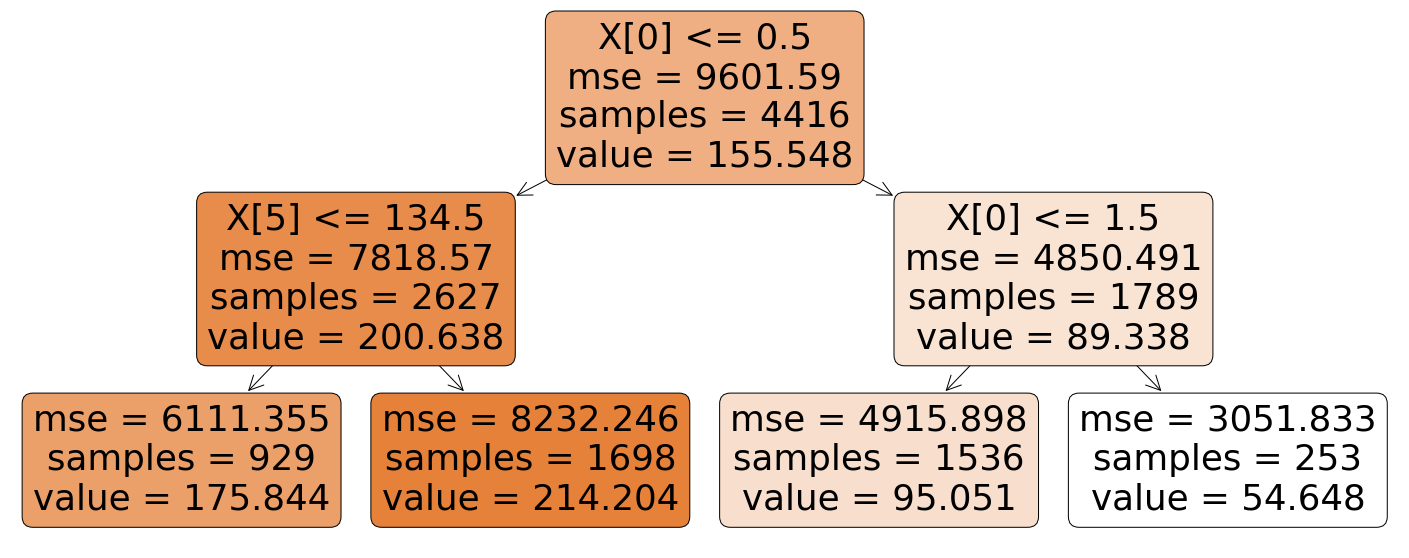

In [173]:
plt.figure(figsize=(25,10))
tree.plot_tree(tree_reg_final,
                rounded = True,
                filled= True)
plt.show() 

In [174]:
#training mse
train_mse = mean_squared_error(tree_reg_final.predict(dtreg_x_train), dtreg_y_train)
print('the training mean squared error is: ', train_mse)

#testing mse
test_mse = mean_squared_error(tree_reg_final.predict(dtreg_x_test), dtreg_y_test)
print('the testing mean squared error is: ',test_mse)

the training mean squared error is:  6335.7641513958
the testing mean squared error is:  6816.4937956235935


In [175]:
# Calculated the RMSE for train and test set
train_rmse = sqrt(mean_squared_error(tree_reg_final.predict(dtreg_x_train), dtreg_y_train))
print('the training RMSE is: ', train_rmse) # RMSE: the lower the better

test_rmse = sqrt(mean_squared_error(tree_reg_final.predict(dtreg_x_test), dtreg_y_test))
print('the testing RMSE is: ', test_rmse) # RMSE: the lower the better

the training RMSE is:  79.59751347495599
the testing RMSE is:  82.56206026755626


In [176]:
#the score function for regressor is calculating R Squared Value of the regression model
# R Squared value rangs from 0 to 1 and the higher the better
train_R2 = tree_reg_final.score(dtreg_x_train, dtreg_y_train)
print('training R^2 value is: ', train_R2)

test_R2 = tree_reg_final.score(dtreg_x_test, dtreg_y_test)
print('testing R^2 value is: ', test_R2)

training R^2 value is:  0.34013382971699135
testing R^2 value is:  0.32335339341816416


In [177]:
# Use GridSearch to find the best combination of model hyperparameters

tree_reg_grid2 = tree.DecisionTreeRegressor(max_depth = 2)

param_grid = { "criterion" : ["mse", "mae"], # use the credentials for regression tree, not classification 
              "min_samples_leaf" : [1, 5, 10], 
              "min_samples_split" : [2, 4, 10, 12, 16], # based on understanding of model and data set to set these parameters
              "max_depth" : [2,3,4,5,6,7] }

gs = GridSearchCV(tree_reg_grid2, param_grid=param_grid, scoring='neg_mean_squared_error', cv= 10, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs = gs.fit(dtreg_x_train, dtreg_y_train) # 

print(gs.best_score_) # ignore negative sign 
print(gs.best_params_)

-5091.41341574284
{'criterion': 'mse', 'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 4}


In [178]:
# Task 4: Create the final new Decision Tree Regressor using the best hyperparameters
tree_reg_final = tree.DecisionTreeRegressor(criterion='mse', max_depth = 7, min_samples_leaf = 10, min_samples_split =2, random_state=0)
tree_reg_final.fit(dtreg_x_train, dtreg_y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=10, random_state=0)

In [179]:
print('***Final Model***')
print('training mse: ', mean_squared_error(tree_reg_final.predict(dtreg_x_train), dtreg_y_train))
print('testing mse: ', mean_squared_error(tree_reg_final.predict(dtreg_x_test), dtreg_y_test))

print(" ")

train_rmse = sqrt(mean_squared_error(tree_reg_final.predict(dtreg_x_train), dtreg_y_train))
print('the training RMSE is: ', train_rmse) # RMSE: the lower the better
test_rmse = sqrt(mean_squared_error(tree_reg_final.predict(dtreg_x_test), dtreg_y_test))
print('the testing RMSE is: ', test_rmse) # RMSE: the lower the betterr

print(" ")

train_R2 = tree_reg_final.score(dtreg_x_train, dtreg_y_train)
print('training R^2 value is: ', train_R2)
test_R2 = tree_reg_final.score(dtreg_x_test, dtreg_y_test)
print('testing R^2 value is: ', test_R2)

print(" ")

results  = cross_validate(tree_reg_final,dtreg_x,dtreg_y,scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('cross val training mse:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing mse:', sum(-results['test_score'])/len(results['test_score']))

***Final Model***
training mse:  4347.22870791801
testing mse:  5511.524440399699
 
the training RMSE is:  65.9335173331289
the testing RMSE is:  74.2396419738114
 
training R^2 value is:  0.5472386455221435
testing R^2 value is:  0.4528925835619959
 
cross val training mse: 4421.4901812543385
cross val testing mse: 5099.09473059557


## Model 3: Random Forest 

### Simple train-test split

In [180]:
# Define Model Inputs (X) and Output (y)
# Set the "price" as target/model output and the rest features as model inputs
# Separating into training and testing sets
rf_reg_x = airbnb_new.drop(['price'], axis=1)
rf_reg_y = airbnb_new['price'] 

rf_reg_x_train, rf_reg_x_test,rf_reg_y_train, rf_reg_y_test = train_test_split(rf_reg_x,rf_reg_y, test_size=0.3, random_state=0)

### 2.2 Build the Model(s)

In [181]:
# using the traing set to train the model

In [182]:
# Create Random Forest Model
from sklearn. ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=20)
# Y_train is a 1D array, use ravel() to change the shape of Y_train to (n_samples,) before feed it into fit function
rf_reg.fit(rf_reg_x_train, rf_reg_y_train) 

RandomForestRegressor(max_depth=2, n_estimators=20, random_state=0)

In [183]:
train_mse =  mean_squared_error(rf_reg.predict(rf_reg_x_train), rf_reg_y_train)
print('the training mean squared error is: ', train_mse)

test_mse = mean_squared_error(rf_reg.predict(rf_reg_x_test), rf_reg_y_test)
print('the testing mean squared error is: ', test_mse)

the training mean squared error is:  6219.74844154814
the testing mean squared error is:  6679.7561871001635


In [184]:
# Calculated the RMSE for train and test set
train_rmse = sqrt(mean_squared_error(rf_reg.predict(rf_reg_x_train), rf_reg_y_train))
print('the training RMSE is: ', train_rmse) # RMSE: the lower the better

test_rmse = sqrt(mean_squared_error(rf_reg.predict(rf_reg_x_test), rf_reg_y_test))
print('the testing RMSE is: ', test_rmse) # RMSE: the lower the better

the training RMSE is:  78.86538176886067
the testing RMSE is:  81.72977540101382


In [185]:
#the score function for regressor is calculating R Squared Value of the regression model
# R Squared value rangs from 0 to 1 and the higher the better
train_R2 = rf_reg.score(rf_reg_x_train, rf_reg_y_train)
print('training R^2 value is: ', train_R2)

test_R2 = rf_reg.score(rf_reg_x_test, rf_reg_y_test)
print('testing R^2 value is: ', test_R2)

training R^2 value is:  0.35221679876705836
testing R^2 value is:  0.33692679956706983


### 2.3 Evaluate and Improve the Model(s)

#### K-folds Cross Validation

In [186]:
# Evaluate the Model using K-folds Cross validation
results  = cross_validate(rf_reg,rf_reg_x, rf_reg_y, scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

train_score:  [-6454.67770014 -6489.09670722 -6314.4163933  -6209.32551039
 -6362.27218468]
test_score:  [-6045.7331542  -6059.06619685 -6645.00696833 -7126.11145643
 -6274.54484669]


In [187]:
print('cross val training mean_squared_error is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing mean_squared_error is:', sum(-results['test_score'])/len(results['test_score']))

cross val training mean_squared_error is: 6365.957699145102
cross val testing mean_squared_error is: 6430.092524500526


#### GridSearch

In [188]:
depth_range = range(2,10) # tuning 2 to 9

train_mse = []
test_mse = []
cross_val_train_mse =[]
cross_val_test_mse =[]

# every time run, test the depth 
for d in depth_range:
    # Create Random Forest Model
    rf_reg_grid = RandomForestRegressor(max_depth=d,random_state=0, n_estimators=20) 
    rf_reg_grid.fit(rf_reg_x_train, rf_reg_y_train) 
    train_mse.append(mean_squared_error(rf_reg_grid.predict(rf_reg_x_train), rf_reg_y_train))
    test_mse.append(mean_squared_error(rf_reg_grid.predict(rf_reg_x_test), rf_reg_y_test))
    
    results  = cross_validate(rf_reg_grid, rf_reg_x, rf_reg_y, scoring='neg_mean_squared_error', cv=5, return_train_score = True)
    cross_val_train_mse.append(sum(-results['train_score'])/len(results['train_score']))
    cross_val_test_mse.append(sum(-results['test_score'])/len(results['test_score']))

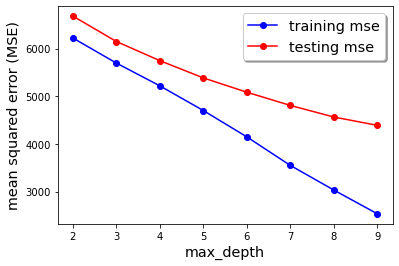

In [189]:
# Plot the simple split measures (train_mse & test_mse) 
plt.plot(depth_range, train_mse, 'bo-', label ='training mse')
plt.plot(depth_range, test_mse, 'ro-', label = 'testing mse')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('mean squared error (MSE)', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

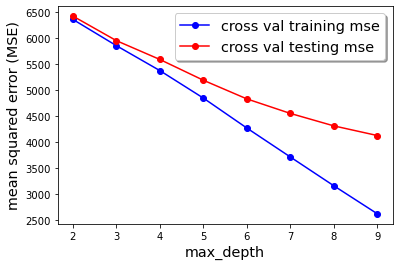

In [190]:
# Plot the cross validation measures (cross_val_train_mse & cross val_test_mse) 
plt.plot(depth_range, cross_val_train_mse, 'bo-', label ='cross val training mse')
plt.plot(depth_range, cross_val_test_mse, 'ro-', label = 'cross val testing mse')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('mean squared error (MSE)', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [191]:
# choosing max_depth of 4 to input into this model 
print('***Grid Search Model Improvement***')
rf_reg_grid = RandomForestRegressor(max_depth=4,random_state=0, n_estimators=20)
rf_reg_grid.fit(rf_reg_x_train, rf_reg_y_train) 
print('training mse: ', mean_squared_error(rf_reg_grid.predict(rf_reg_x_train), rf_reg_y_train))
print('testing mse: ', mean_squared_error(rf_reg_grid.predict(rf_reg_x_test), rf_reg_y_test))

print(" ")

train_rmse = sqrt(mean_squared_error(rf_reg_grid.predict(rf_reg_x_train), rf_reg_y_train))
print('the training RMSE is: ', train_rmse) # RMSE: the lower the better
test_rmse = sqrt(mean_squared_error(rf_reg_grid.predict(rf_reg_x_test), rf_reg_y_test))
print('the testing RMSE is: ', test_rmse) # RMSE: the lower the betterr

print(" ")

train_R2 = rf_reg_grid.score(rf_reg_x_train, rf_reg_y_train)
print('training R^2 value is: ', train_R2)
test_R2 = rf_reg_grid.score(rf_reg_x_test, rf_reg_y_test)
print('testing R^2 value is: ', test_R2)

***Grid Search Model Improvement***
training mse:  5216.130875650296
testing mse:  5745.022354503564
 
the training RMSE is:  72.22278640187109
the testing RMSE is:  75.79592571176609
 
training R^2 value is:  0.45674298752865683
testing R^2 value is:  0.42971416134678686


#### Selecting different input features 

In [192]:
rf_pval = sm.OLS(rf_reg_y_train, rf_reg_x_train).fit()
# Summary statistics from the model
rf_pval.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.825
Model:                            OLS   Adj. R-squared (uncentered):              0.825
Method:                 Least Squares   F-statistic:                              2308.
Date:                Mon, 13 Feb 2023   Prob (F-statistic):                        0.00
Time:                        18:33:25   Log-Likelihood:                         -25443.
No. Observations:                4416   AIC:                                  5.090e+04
Df Residuals:                    4407   BIC:                                  5.096e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
neighbourhood                   -138.3154     24.051     -5.751      0.000    -185.468     -91.162
latitude                        -243.8361     74.466     -3.274      0.001    -389.826     -97.846
longitude                          5.2807      0.930      5.679      0.000       3.458       7.104
room_type                       -103.8708      2.118    -49.050      0.000    -108.023     -99.719
minimum_nights                   -27.5749      1.700    -16.225      0.000     -30.907     -24.243
number_of_reviews                 -0.3527      0.048     -7.302      0.000      -0.447      -0.258
reviews_per_month                  3.9569      1.543      2.564      0.010       0.932       6.982
calculated_host_listings_count    -3.8290      0.741     -5.168      0.000      -5.281      -2.377
availability_365                   0.1356      0.009     14.737      0.000       0.118       0.154
==============================================================================
Omnibus:                      707.146   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1157.801
Skew:                           1.076   Prob(JB):                    3.86e-252
Kurtosis:                       4.289   Cond. No.                     1.78e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Random Forest Regressor Model's P-value indicates that there is very high confidence on all of the coefficients of these features, meaning that these are equally strong indicators to predict the target ["price]. 

However, from the calculated R^2, RMSE and MSE evaluation scores test on this model, the model's performance does not reflect the same confidence since all the scores calculated were extremely poor. 

In summary, the p-value may show that all of the features are significant but this may be a sign of needing more variables in the data for the model to be able to better predict as additional predictors can increase the true explanatory power of the model. On the other hand, the data could inherently have a higher amount of unexplainable variability that the random forest model is able to identify. Hence, leading to the poor RMSE, R^2 and MSE scores. 

In [193]:
# Trying Feature Importance

In [194]:
rf_reg_grid.feature_importances_

array([0.03298605, 0.02987671, 0.02842129, 0.74253424, 0.06884516,
       0.00353058, 0.00346427, 0.02861507, 0.06172662])

In [195]:
pd.concat((pd.DataFrame(rf_reg_x_test.columns, columns = ['feature']), 
           pd.DataFrame(rf_reg_grid.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)

# reduce the number of features by how important it is 

,feature,importance
3,room_type,0.742534
4,minimum_nights,0.068845
8,availability_365,0.061727
0,neighbourhood,0.032986
1,latitude,0.029877
7,calculated_host_listings_count,0.028615
2,longitude,0.028421
5,number_of_reviews,0.003531
6,reviews_per_month,0.003464


In [196]:
# Defining New Inputs

In [197]:
# Define new Model Inputs (X) and Output (y)
rf_reg_x = airbnb_new[["room_type", "minimum_nights", "availability_365", "neighbourhood", "latitude", "calculated_host_listings_count", "longitude"]]
rf_reg_y = airbnb_new["price"]

rf_reg_x_train, rf_reg_x_test, rf_reg_y_train, rf_reg_y_test = train_test_split(rf_reg_x, rf_reg_y, test_size=0.3, random_state=0)

In [198]:
# Create Random Forest Model
rf_reg_new = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=20)
rf_reg_new.fit(rf_reg_x_train, rf_reg_y_train) 

RandomForestRegressor(max_depth=2, n_estimators=20, random_state=0)

In [199]:
train_mse =  mean_squared_error(rf_reg_new.predict(rf_reg_x_train), rf_reg_y_train)
print('the training mean squared error is: ', train_mse)

test_mse = mean_squared_error(rf_reg_new.predict(rf_reg_x_test), rf_reg_y_test)
print('the testing mean squared error is: ', test_mse)

the training mean squared error is:  6219.74844154814
the testing mean squared error is:  6679.7561871001635


In [200]:
# Calculated the RMSE for train and test set
train_rmse = sqrt(mean_squared_error(rf_reg_new.predict(rf_reg_x_train), rf_reg_y_train))
print('the training RMSE is: ', train_rmse) # RMSE: the lower the better

test_rmse = sqrt(mean_squared_error(rf_reg_new.predict(rf_reg_x_test), rf_reg_y_test))
print('the testing RMSE is: ', test_rmse) # RMSE: the lower the better

the training RMSE is:  78.86538176886067
the testing RMSE is:  81.72977540101382


In [201]:
#the score function for regressor is calculating R Squared Value of the regression model
# R Squared value rangs from 0 to 1 and the higher the better
train_R2 = rf_reg_new.score(rf_reg_x_train, rf_reg_y_train)
print('training R^2 value is: ', train_R2)

test_R2 = rf_reg_new.score(rf_reg_x_test, rf_reg_y_test)
print('testing R^2 value is: ', test_R2)

training R^2 value is:  0.35221679876705836
testing R^2 value is:  0.33692679956706983


In [202]:
# gridsearch again 
depth_range = range(2,10) # tuning 2 to 9

train_mse = []
test_mse = []
cross_val_train_mse =[]
cross_val_test_mse =[]

# every time run, test the depth 
for d in depth_range:
    # Create Random Forest Model
    rf_reg_grid2 = RandomForestRegressor(max_depth=d,random_state=0, n_estimators=20) 
    rf_reg_grid2.fit(rf_reg_x_train, rf_reg_y_train) 
    train_mse.append(mean_squared_error(rf_reg_grid2.predict(rf_reg_x_train), rf_reg_y_train))
    test_mse.append(mean_squared_error(rf_reg_grid2.predict(rf_reg_x_test), rf_reg_y_test))
    
    results  = cross_validate(rf_reg_grid2, rf_reg_x, rf_reg_y, scoring='neg_mean_squared_error', cv=5, return_train_score = True)
    cross_val_train_mse.append(sum(-results['train_score'])/len(results['train_score']))
    cross_val_test_mse.append(sum(-results['test_score'])/len(results['test_score']))

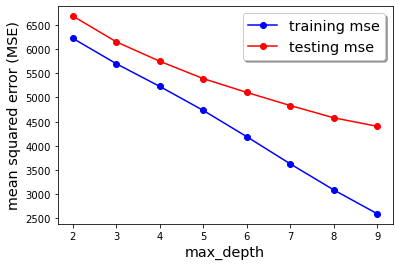

In [203]:
# Plot the simple split measures (train_mse & test_mse) 
plt.plot(depth_range, train_mse, 'bo-', label ='training mse')
plt.plot(depth_range, test_mse, 'ro-', label = 'testing mse')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('mean squared error (MSE)', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

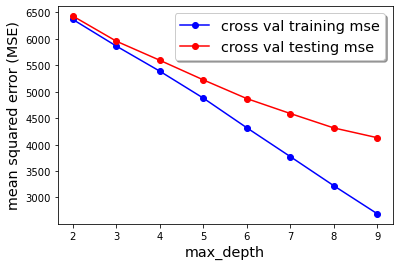

In [204]:
# Plot the cross validation measures (cross_val_train_mse & cross val_test_mse) 
plt.plot(depth_range, cross_val_train_mse, 'bo-', label ='cross val training mse')
plt.plot(depth_range, cross_val_test_mse, 'ro-', label = 'cross val testing mse')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('mean squared error (MSE)', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [205]:
print('*** Final Model ***')
rf_reg_final = RandomForestRegressor(max_depth=5,random_state=0, n_estimators=20)
rf_reg_final.fit(rf_reg_x_train, rf_reg_y_train) 
print('training mse: ', mean_squared_error(rf_reg_final.predict(rf_reg_x_train), rf_reg_y_train))
print('testing mse: ', mean_squared_error(rf_reg_final.predict(rf_reg_x_test), rf_reg_y_test))

print(" ")

train_rmse = sqrt(mean_squared_error(rf_reg_final.predict(rf_reg_x_train), rf_reg_y_train))
print('the training RMSE is: ', train_rmse) # RMSE: the lower the better
test_rmse = sqrt(mean_squared_error(rf_reg_final.predict(rf_reg_x_test), rf_reg_y_test))
print('the testing RMSE is: ', test_rmse) # RMSE: the lower the betterr

print(" ")

train_R2 = rf_reg_final.score(rf_reg_x_train, rf_reg_y_train)
print('training R^2 value is: ', train_R2)
test_R2 = rf_reg_final.score(rf_reg_x_test, rf_reg_y_test)
print('testing R^2 value is: ', test_R2)

print(" ")

results  = cross_validate(rf_reg_final,rf_reg_x,rf_reg_y,scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('cross val training mse:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing mse:', sum(-results['test_score'])/len(results['test_score']))

*** Final Model ***
training mse:  4730.71054471724
testing mse:  5388.184362596537
 
the training RMSE is:  68.78016098205383
the testing RMSE is:  73.40425302798562
 
training R^2 value is:  0.5072992341149095
testing R^2 value is:  0.46513606937791974
 
cross val training mse: 4877.933170866028
cross val testing mse: 5223.349232706352


Note: feature importance was able to identify weaker features in this model in comparison to the p-value 

### Further Improvement (After Presentation)

## Model 4: SVM - Support Vector Machine

### Simple train-test split

In [206]:
# Define Model Inputs (X) and Output (y)
# Set the "price" as target/model output and the rest features as model inputs
# Separating into training and testing sets
svr_x = airbnb_new.drop(['price'], axis=1)
svr_y = airbnb_new['price'] 

svr_x_train, svr_x_test, svr_y_train, svr_y_test = train_test_split(svr_x,svr_y, test_size=0.3, random_state=0)

### 2.2 Build the Model(s)

In [207]:
# Create SVR Model
# Build Model and Evaluate both training and testing MSE
svr_model = svm.SVR(kernel='linear', gamma = 0.001, C = 0.1)
svr_model.fit(svr_x_train, svr_y_train)

print('the training mean squared error is: ', mean_squared_error(svr_model.predict(svr_x_train), svr_y_train))
print('the testing mean squared error is: ', mean_squared_error(svr_model.predict(svr_x_test), svr_y_test))

the training mean squared error is:  7459.215246663745
the testing mean squared error is:  8120.838699408771


In [208]:
train_rmse = sqrt(mean_squared_error(svr_model.predict(svr_x_train), svr_y_train))
print('the training RMSE is: ', train_rmse) # RMSE: the lower the better

test_rmse = sqrt(mean_squared_error(svr_model.predict(svr_x_test), svr_y_test))
print('the testing RMSE is: ', test_rmse) # RMSE: the lower the better

the training RMSE is:  86.3667485011665
the testing RMSE is:  90.1156961877828


In [209]:
train_R2 = svr_model.score(svr_x_train, svr_y_train)
print('training R^2 value is: ', train_R2)

test_R2 = svr_model.score(svr_x_test, svr_y_test)
print('testing R^2 value is: ', test_R2)

training R^2 value is:  0.22312704821118157
testing R^2 value is:  0.19387619011971824


### 2.3 Evaluate and Improve the Model(s)

#### K-Folds Cross Validation 

In [210]:
# Evaluate the Model using K-folds Cross validation
results = cross_validate(svr_model,svr_x,svr_y,scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training mean_squared_error is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing mean_squared_error is:', sum(-results['test_score'])/len(results['test_score']))

train_score:  [-7577.77857671 -7568.80158194 -7465.13203307 -7278.63118226
 -7478.94284857]
test_score:  [-7009.8620905  -6888.20093363 -7350.71483836 -8545.06810784
 -7609.40914703]
cross val training mean_squared_error is: 7473.857244510824
cross val testing mean_squared_error is: 7480.65102347215


#### GridSearchCV

In [211]:
# Use GridSearch to find the best combination of model hyperparameters

svr_model_grid = svm.SVR(kernel='linear', gamma = 0.001, C = 0.1)

param_grid = {'kernel': ['linear','rbf'], 
              'C':[0.5, 1.5, 3],
              'gamma': [0.001, 0.0001]}

gs = GridSearchCV(svr_model_grid, param_grid=param_grid, scoring='neg_mean_squared_error', cv= 10, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs = gs.fit(svr_x_train, svr_y_train) # 

print(gs.best_score_) # ignore negative sign 
print(gs.best_params_)

-6495.830235935139
{'C': 3, 'gamma': 0.001, 'kernel': 'linear'}


In [212]:
svr_model_improved = svm.SVR(kernel='linear', gamma = 0.001, C = 3)
svr_model_improved.fit(svr_x_train, svr_y_train)

SVR(C=3, gamma=0.001, kernel='linear')

In [213]:
print('the training mean squared error is: ', mean_squared_error(svr_model_improved.predict(svr_x_train), svr_y_train))
print('the testing mean squared error is: ', mean_squared_error(svr_model_improved.predict(svr_x_test), svr_y_test))

the training mean squared error is:  6480.16070565544
the testing mean squared error is:  7093.507217993804


In [214]:
train_rmse = sqrt(mean_squared_error(svr_model_improved.predict(svr_x_train), svr_y_train))
print('the training RMSE is: ', train_rmse) # RMSE: the lower the better

test_rmse = sqrt(mean_squared_error(svr_model_improved.predict(svr_x_test), svr_y_test))
print('the testing RMSE is: ', test_rmse) # RMSE: the lower the better

the training RMSE is:  80.49944537483125
the testing RMSE is:  84.22296134661737


In [215]:
train_R2 = svr_model_improved.score(svr_x_train, svr_y_train)
print('training R^2 value is: ', train_R2)

test_R2 = svr_model_improved.score(svr_x_test, svr_y_test)
print('testing R^2 value is: ', test_R2)

training R^2 value is:  0.32509501214352143
testing R^2 value is:  0.29585535735382174


#### Selecting different input features

In [216]:
# feature importance 

In [217]:
svr_reg_pval = sm.OLS(svr_y_train, svr_x_train).fit()

In [218]:
svr_reg_pval.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.825
Model:                            OLS   Adj. R-squared (uncentered):              0.825
Method:                 Least Squares   F-statistic:                              2308.
Date:                Mon, 13 Feb 2023   Prob (F-statistic):                        0.00
Time:                        18:36:24   Log-Likelihood:                         -25443.
No. Observations:                4416   AIC:                                  5.090e+04
Df Residuals:                    4407   BIC:                                  5.096e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
neighbourhood                   -138.3154     24.051     -5.751      0.000    -185.468     -91.162
latitude                        -243.8361     74.466     -3.274      0.001    -389.826     -97.846
longitude                          5.2807      0.930      5.679      0.000       3.458       7.104
room_type                       -103.8708      2.118    -49.050      0.000    -108.023     -99.719
minimum_nights                   -27.5749      1.700    -16.225      0.000     -30.907     -24.243
number_of_reviews                 -0.3527      0.048     -7.302      0.000      -0.447      -0.258
reviews_per_month                  3.9569      1.543      2.564      0.010       0.932       6.982
calculated_host_listings_count    -3.8290      0.741     -5.168      0.000      -5.281      -2.377
availability_365                   0.1356      0.009     14.737      0.000       0.118       0.154
==============================================================================
Omnibus:                      707.146   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1157.801
Skew:                           1.076   Prob(JB):                    3.86e-252
Kurtosis:                       4.289   Cond. No.                     1.78e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [219]:
# Feature Importance cannot be performed since svm does not accept the feature importance clause

## Model 5: XGBoost - eXtreme Gradient Boosting 

### 2.1 Simple Train Test Split

In [220]:
# Define Model Inputs (X) and Output (y)
# Set the "" as target/model output and the rest features as model inputs
# Separating into training and testing sets
xgb_reg_x = airbnb_new.drop(['price'], axis=1)
xgb_reg_y = airbnb_new['price'] 

xgb_reg_x_train, xgb_reg_x_test, xgb_reg_y_train, xgb_reg_y_test = train_test_split(xgb_reg_x,xgb_reg_y, test_size=0.3, random_state=0)

### 2.2 Build the Model 

In [221]:
xgb_reg = XGBRegressor(max_depth=2, random_state=0, n_estimators=50)
xgb_reg.fit(xgb_reg_x_train, xgb_reg_y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

In [222]:
# show the results of the train and test datasets

In [223]:
print('training R^2 score is: ', xgb_reg.score(xgb_reg_x_train, xgb_reg_y_train))
print('testing R^2 score is: ', xgb_reg.score(xgb_reg_x_test,xgb_reg_y_test))

training R^2 score is:  0.5474226186974454
testing R^2 score is:  0.49339856116009684


In [224]:
train_rmse = sqrt(mean_squared_error(xgb_reg.predict(xgb_reg_x_train), xgb_reg_y_train))
print('the training RMSE is: ', train_rmse) # RMSE: the lower the better

test_rmse = sqrt(mean_squared_error(xgb_reg.predict(xgb_reg_x_test), xgb_reg_y_test))
print('the testing RMSE is: ', test_rmse) # RMSE: the lower the better

the training RMSE is:  65.92012039577287
the testing RMSE is:  71.43857405610304


In [225]:
print('the training mean squared error is: ', mean_squared_error(xgb_reg.predict(xgb_reg_x_train), xgb_reg_y_train))
print('the testing mean squared error is: ', mean_squared_error(xgb_reg.predict(xgb_reg_x_test), xgb_reg_y_test))

the training mean squared error is:  4345.46227299319
the testing mean squared error is:  5103.469863169318


### 2.3 Evaluate and Improve the Model(s

#### K-Folds Cross Validation 

In [226]:
# Evaluate the Model using K-folds Cross validation
results = cross_validate(xgb_reg, xgb_reg_x, xgb_reg_y,scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training mean_squared_error is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing mean_squared_error is:', sum(-results['test_score'])/len(results['test_score']))

train_score:  [-4636.54637289 -4569.28942003 -4469.94261157 -4391.15807211
 -4493.57371427]
test_score:  [-4492.59913147 -4538.23697552 -4979.24335806 -5303.25808555
 -4886.14177598]
cross val training mean_squared_error is: 4512.102038172898
cross val testing mean_squared_error is: 4839.895865314528


#### GridSeachCV

In [227]:
xgb_reg_grid = XGBRegressor(max_depth=2, random_state=0, n_estimators=50)

param_grid = {"max_depth" : [2, 3 , 4, 5, 6], 
              "n_estimators": [10, 20, 50, 100]}

gs = GridSearchCV(estimator=xgb_reg_grid, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

gs = gs.fit(xgb_reg_x_train, xgb_reg_y_train)

print(gs.best_score_)
print(gs.best_params_)

-3883.306800071657
{'max_depth': 6, 'n_estimators': 50}


In [228]:
# create the new model 
xgb_reg_improved = XGBRegressor(max_depth=6, random_state=0, n_estimators=50)
xgb_reg_improved.fit(xgb_reg_x_train, xgb_reg_y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

In [229]:
print('training R^2 score is: ', xgb_reg_improved.score(xgb_reg_x_train, xgb_reg_y_train))
print('testing R^2 score is: ', xgb_reg_improved.score(xgb_reg_x_test,xgb_reg_y_test))

training R^2 score is:  0.8589225634962415
testing R^2 score is:  0.5789007771425041


In [230]:
train_rmse = sqrt(mean_squared_error(xgb_reg_improved.predict(xgb_reg_x_train), xgb_reg_y_train))
print('the training RMSE is: ', train_rmse) # RMSE: the lower the better

test_rmse = sqrt(mean_squared_error(xgb_reg_improved.predict(xgb_reg_x_test), xgb_reg_y_test))
print('the testing RMSE is: ', test_rmse) # RMSE: the lower the betterr

the training RMSE is:  36.80445143893896
the testing RMSE is:  65.13160610889892


In [231]:
print('the training mean squared error is: ', mean_squared_error(xgb_reg_improved.predict(xgb_reg_x_train), xgb_reg_y_train))
print('the testing mean squared error is: ', mean_squared_error(xgb_reg_improved.predict(xgb_reg_x_test), xgb_reg_y_test))

the training mean squared error is:  1354.567645721216
the testing mean squared error is:  4242.12611432476


#### Selecting different input features

In [232]:
xgb_reg_pval = sm.OLS(xgb_reg_y_train, xgb_reg_x_train).fit()
# Summary statistics from the model
xgb_reg_pval.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.825
Model:                            OLS   Adj. R-squared (uncentered):              0.825
Method:                 Least Squares   F-statistic:                              2308.
Date:                Mon, 13 Feb 2023   Prob (F-statistic):                        0.00
Time:                        18:36:29   Log-Likelihood:                         -25443.
No. Observations:                4416   AIC:                                  5.090e+04
Df Residuals:                    4407   BIC:                                  5.096e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
neighbourhood                   -138.3154     24.051     -5.751      0.000    -185.468     -91.162
latitude                        -243.8361     74.466     -3.274      0.001    -389.826     -97.846
longitude                          5.2807      0.930      5.679      0.000       3.458       7.104
room_type                       -103.8708      2.118    -49.050      0.000    -108.023     -99.719
minimum_nights                   -27.5749      1.700    -16.225      0.000     -30.907     -24.243
number_of_reviews                 -0.3527      0.048     -7.302      0.000      -0.447      -0.258
reviews_per_month                  3.9569      1.543      2.564      0.010       0.932       6.982
calculated_host_listings_count    -3.8290      0.741     -5.168      0.000      -5.281      -2.377
availability_365                   0.1356      0.009     14.737      0.000       0.118       0.154
==============================================================================
Omnibus:                      707.146   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1157.801
Skew:                           1.076   Prob(JB):                    3.86e-252
Kurtosis:                       4.289   Cond. No.                     1.78e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [233]:
# using feature importance

In [234]:
xgb_reg_improved.feature_importances_

array([0.03277735, 0.02584612, 0.02899274, 0.7196894 , 0.04811383,
       0.02769205, 0.02482961, 0.04472932, 0.04732949], dtype=float32)

In [235]:
pd.concat((pd.DataFrame(xgb_reg_x_train.columns, columns = ['feature']), 
           pd.DataFrame(xgb_reg_improved.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)


,feature,importance
3,room_type,0.719689
4,minimum_nights,0.048114
8,availability_365,0.047329
7,calculated_host_listings_count,0.044729
0,neighbourhood,0.032777
2,longitude,0.028993
5,number_of_reviews,0.027692
1,latitude,0.025846
6,reviews_per_month,0.024830


### Model 6: Ada Boost 

#### Simple Train Test Split 

In [236]:
# Define Model Inputs (X) and Output (y)
# Set the "" as target/model output and the rest features as model inputs
# Separating into training and testing sets
adareg_x = airbnb_new.drop(['price'], axis=1)
adareg_y = airbnb_new['price'] 

adareg_x_train, adareg_x_test, adareg_y_train, adareg_y_test = train_test_split(adareg_x,adareg_y, test_size=0.3, random_state=0)

### 2.2 Build the Model(s) 

In [237]:
abd_reg = AdaBoostRegressor(n_estimators=200, random_state=0, learning_rate=0.1)
abd_reg.fit(adareg_x_train,adareg_y_train)

print('training R^2 value is: ', abd_reg.score(adareg_x_train,adareg_y_train))
print('testing R^2 value is: ', abd_reg.score(adareg_x_test,adareg_y_test))

training R^2 value is:  0.3824323504059729
testing R^2 value is:  0.3811157666094328


In [238]:
train_rmse = sqrt(mean_squared_error(abd_reg.predict(adareg_x_train), adareg_y_train))
print('the training RMSE is: ', train_rmse) # RMSE: the lower the better

test_rmse = sqrt(mean_squared_error(abd_reg.predict(adareg_x_test), adareg_y_test))
print('the testing RMSE is: ', test_rmse) # RMSE: the lower the better

the training RMSE is:  77.00409804338481
the testing RMSE is:  78.95947957242738


In [239]:
print('training mse: ', mean_squared_error(abd_reg.predict(adareg_x_train), adareg_y_train))

print('testing mse: ', mean_squared_error(abd_reg.predict(adareg_x_test), adareg_y_test))

training mse:  5929.631115475222
testing mse:  6234.599414348577


### 2.3 Evaluate and Improve the Model(s) 

#### K-Folds Cross Validation 

In [240]:
# Evaluate the Model using K-folds Cross validation
results = cross_validate(abd_reg,adareg_x,adareg_y,scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training mean_squared_error is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing mean_squared_error is:', sum(-results['test_score'])/len(results['test_score']))

train_score:  [-6236.81712803 -6214.59286247 -6152.53915724 -6023.23284783
 -6041.77401813]
test_score:  [-6048.18438957 -6167.41090707 -6297.74429192 -6700.16504616
 -6226.57848142]
cross val training mean_squared_error is: 6133.791202742083
cross val testing mean_squared_error is: 6288.01662322704


#### GridSearchCV

In [241]:
abdreg_grid = AdaBoostRegressor(n_estimators=200, random_state=0, learning_rate=0.1)

param_grid = {"learning_rate" : [0.02, 0.05, 0.1, 0.5, 1], 
              "n_estimators": [10, 20, 50, 100]}

gs = GridSearchCV(estimator=abdreg_grid, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

gs = gs.fit(adareg_x_train,adareg_y_train)

print(gs.best_score_)
print(gs.best_params_)

-5800.824520120033
{'learning_rate': 0.02, 'n_estimators': 50}


In [242]:
abdreg2 = AdaBoostRegressor(n_estimators=50, random_state=0, learning_rate=0.02)
abdreg2.fit(adareg_x_train,adareg_y_train)

AdaBoostRegressor(learning_rate=0.02, random_state=0)

In [243]:
print('training R^2 value is: ', abdreg2.score(adareg_x_train,adareg_y_train))
print('testing R^2 value is: ', abdreg2.score(adareg_x_test,adareg_y_test))

training R^2 value is:  0.4077563956401332
testing R^2 value is:  0.3971882616637521


In [244]:
train_rmse = sqrt(mean_squared_error(abdreg2.predict(adareg_x_train), adareg_y_train))
print('the training RMSE is: ', train_rmse) # RMSE: the lower the better

test_rmse = sqrt(mean_squared_error(abdreg2.predict(adareg_x_test), adareg_y_test))
print('the testing RMSE is: ', test_rmse) # RMSE: the lower the betterr

the training RMSE is:  75.4087529825133
the testing RMSE is:  77.92744155391584


In [245]:
print('training mse: ', mean_squared_error(abdreg2.predict(adareg_x_train), adareg_y_train))

print('testing mse: ', mean_squared_error(abdreg2.predict(adareg_x_test), adareg_y_test))

training mse:  5686.480026377709
testing mse:  6072.68614713897


#### Selecting Different Input Features

In [246]:
abdreg_pval = sm.OLS(adareg_y_train, adareg_x_train).fit()
# Summary statistics from the model
abdreg_pval.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.825
Model:                            OLS   Adj. R-squared (uncentered):              0.825
Method:                 Least Squares   F-statistic:                              2308.
Date:                Mon, 13 Feb 2023   Prob (F-statistic):                        0.00
Time:                        18:36:38   Log-Likelihood:                         -25443.
No. Observations:                4416   AIC:                                  5.090e+04
Df Residuals:                    4407   BIC:                                  5.096e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
neighbourhood                   -138.3154     24.051     -5.751      0.000    -185.468     -91.162
latitude                        -243.8361     74.466     -3.274      0.001    -389.826     -97.846
longitude                          5.2807      0.930      5.679      0.000       3.458       7.104
room_type                       -103.8708      2.118    -49.050      0.000    -108.023     -99.719
minimum_nights                   -27.5749      1.700    -16.225      0.000     -30.907     -24.243
number_of_reviews                 -0.3527      0.048     -7.302      0.000      -0.447      -0.258
reviews_per_month                  3.9569      1.543      2.564      0.010       0.932       6.982
calculated_host_listings_count    -3.8290      0.741     -5.168      0.000      -5.281      -2.377
availability_365                   0.1356      0.009     14.737      0.000       0.118       0.154
==============================================================================
Omnibus:                      707.146   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1157.801
Skew:                           1.076   Prob(JB):                    3.86e-252
Kurtosis:                       4.289   Cond. No.                     1.78e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

p value shows that there is high confidence in all of the features. 

In [247]:
abdreg2.feature_importances_

array([0.02608476, 0.01422616, 0.0153526 , 0.7867768 , 0.0659297 ,
       0.00169914, 0.00211546, 0.0265129 , 0.06130248])

In [248]:
pd.concat((pd.DataFrame(adareg_x_train.columns, columns = ['feature']), 
           pd.DataFrame(abdreg2.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)

# reduce the number of features by how important it is 

,feature,importance
3,room_type,0.786777
4,minimum_nights,0.065930
8,availability_365,0.061302
7,calculated_host_listings_count,0.026513
0,neighbourhood,0.026085
2,longitude,0.015353
1,latitude,0.014226
6,reviews_per_month,0.002115
5,number_of_reviews,0.001699


In [249]:
#### Defining New Inputs

In [250]:
# Define new Model Inputs (X) and Output (y)
adareg_x = airbnb_new[["room_type", "minimum_nights", "availability_365", "neighbourhood", "latitude", "calculated_host_listings_count", "longitude"]]
adareg_y = airbnb_new["price"]

adareg_x_train, adareg_x_test, adareg_y_train, adareg_y_test = train_test_split(adareg_x,adareg_y, test_size=0.3, random_state=0)

In [251]:
abdreg_new = AdaBoostRegressor(n_estimators=50, random_state=0, learning_rate=0.02)
abdreg_new.fit(adareg_x_train,adareg_y_train)

AdaBoostRegressor(learning_rate=0.02, random_state=0)

In [252]:
print('training R^2 value is: ', abdreg_new.score(adareg_x_train,adareg_y_train))
print('testing R^2 value is: ', abdreg_new.score(adareg_x_test,adareg_y_test))

training R^2 value is:  0.40569364693985244
testing R^2 value is:  0.39559501513469664


In [253]:
train_rmse = sqrt(mean_squared_error(abdreg_new.predict(adareg_x_train), adareg_y_train))
print('the training RMSE is: ', train_rmse) # RMSE: the lower the better

test_rmse = sqrt(mean_squared_error(abdreg_new.predict(adareg_x_test), adareg_y_test))
print('the testing RMSE is: ', test_rmse) # RMSE: the lower the better

the training RMSE is:  75.5399609003417
the testing RMSE is:  78.0303556879561


In [254]:
print('training mse: ', mean_squared_error(abdreg_new.predict(adareg_x_train), adareg_y_train))

print('testing mse: ', mean_squared_error(abdreg_new.predict(adareg_x_test), adareg_y_test))

training mse:  5706.285692825152
testing mse:  6088.736408788944


In [255]:
# gridsearch
abdreg_grid2 = AdaBoostRegressor(n_estimators=200, random_state=0, learning_rate=0.1)

param_grid = {"learning_rate" : [0.02, 0.05, 0.1, 0.5, 1], 
              "n_estimators": [10, 20, 50, 100]}

gs = GridSearchCV(estimator=abdreg_grid2, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

gs = gs.fit(adareg_x_train,adareg_y_train)

print(gs.best_score_)
print(gs.best_params_)

-5801.932375862525
{'learning_rate': 0.02, 'n_estimators': 50}


In [256]:
print('*** Final Model ***')
abd_reg_final = AdaBoostRegressor(n_estimators=50, random_state=0, learning_rate=0.02)
abd_reg_final.fit(adareg_x_train,adareg_y_train)
print('training mse: ', mean_squared_error(abd_reg_final.predict(adareg_x_train), adareg_y_train))
print('testing mse: ', mean_squared_error(abd_reg_final.predict(adareg_x_test), adareg_y_test))

print(" ")

train_rmse = sqrt(mean_squared_error(abd_reg_final.predict(adareg_x_train), adareg_y_train))
print('the training RMSE is: ', train_rmse) # RMSE: the lower the better
test_rmse = sqrt(mean_squared_error(rf_reg_final.predict(adareg_x_test), adareg_y_test))
print('the testing RMSE is: ', test_rmse) # RMSE: the lower the betterr

print(" ")

train_R2 = abd_reg_final.score(adareg_x_train, adareg_y_train)
print('training R^2 value is: ', train_R2)
test_R2 = abd_reg_final.score(adareg_x_test, adareg_y_test)
print('testing R^2 value is: ', test_R2)

print(" ")

results  = cross_validate(abd_reg_final,rf_reg_x,rf_reg_y,scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('cross val training mse:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing mse:', sum(-results['test_score'])/len(results['test_score']))

*** Final Model ***
training mse:  5706.285692825152
testing mse:  6088.736408788944
 
the training RMSE is:  75.5399609003417
the testing RMSE is:  73.40425302798562
 
training R^2 value is:  0.40569364693985244
testing R^2 value is:  0.39559501513469664
 
cross val training mse: 5868.67899132722
cross val testing mse: 5975.062406173597
